In [14]:
# =============================================================================
# PHASE 1: PROJECT SETUP AND PROMPT DATASET GENERATION
# =============================================================================
# This phase sets up the my project structure, installs dependencies, and creates
# a diverse set of text prompts for evaluating Stable Diffusion image generation.
# We're using 500 prompts across 5 categories to ensure statistical validity.
# =============================================================================

# First, let's mount Google Drive to save our work persistently
from google.colab import drive
import os

print("Connecting to Google Drive...")
drive.mount('/content/drive')
print("Drive connected successfully!\n")

# Setting up the main project directory and subfolders
# everything in a clear hierarchy for easy access later
PROJECT_PATH = '/content/drive/MyDrive/T2I_Evaluation_Project'

folders = [
    f'{PROJECT_PATH}/data/generated_images',
    f'{PROJECT_PATH}/data/reference_images',
    f'{PROJECT_PATH}/results/plots',
    f'{PROJECT_PATH}/presentation'
]

print("Creating project directory structure...")
for folder in folders:
    os.makedirs(folder, exist_ok=True)
    print(f"  Created: {folder}")

print(f"\nProject will be stored at: {PROJECT_PATH}")

# =============================================================================
# INSTALLING REQUIRED PACKAGES
# =============================================================================
# These libraries handle image generation, deep learning metrics, and analysis
# The installation takes a few minutes on first run

print("\n" + "=" * 60)
print("Installing required packages (this takes 2-3 minutes)...")
print("=" * 60)

# Core deep learning and image generation
!pip install -q diffusers transformers accelerate
!pip install -q torch torchvision torchaudio

# Evaluation metrics - these compute FID, IS, etc.
!pip install -q pytorch-fid clean-fid torchmetrics

# Computer vision for preprocessing
!pip install -q opencv-python

# Data handling and visualization
!pip install -q pandas matplotlib seaborn Pillow

# For downloading COCO dataset reliably
!pip install -q datasets

print("\nAll packages installed!")

# Quick verification that everything loaded correctly
import torch
import cv2
import pandas as pd

print(f"\nVerification:")
print(f"  PyTorch: {torch.__version__}")
print(f"  CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"  GPU: {torch.cuda.get_device_name(0)}")
print(f"  OpenCV: {cv2.__version__}")

# =============================================================================
# CREATING THE PROMPT DATASET (500 PROMPTS)
# =============================================================================
# I'm creating 100 prompts per category (5 categories = 500 total)
# This gives us enough samples for reliable statistical analysis
# Each category tests a different aspect of the model's capabilities

print("\n" + "=" * 60)
print("Generating prompt dataset (500 prompts, 5 categories)")
print("=" * 60)

# Category 1: Simple Objects (100 prompts)
# Testing basic object recognition and rendering ability
objects_prompts = [
    # Common everyday objects
    "a red bicycle", "a wooden chair", "a coffee mug", "a laptop computer",
    "a potted plant", "a table lamp", "a wristwatch", "a backpack",
    "a guitar", "a camera", "a pair of scissors", "a pencil",
    "a book", "a water bottle", "a baseball cap", "a soccer ball",
    "a teddy bear", "an umbrella", "a suitcase", "a telephone",
    # Kitchen items
    "a frying pan", "a toaster", "a coffee maker", "a blender",
    "a cutting board", "a wine glass", "a ceramic plate", "a fork and knife",
    "a tea kettle", "a rolling pin",
    # Electronics
    "a television", "a remote control", "a computer mouse", "a keyboard",
    "a smartphone", "a tablet", "headphones", "a speaker",
    "a video game controller", "a USB cable",
    # Furniture
    "a sofa", "a bookshelf", "a desk", "a bed frame",
    "a coffee table", "a dining table", "a wardrobe", "a mirror",
    "a rug", "a curtain",
    # Outdoor items
    "a bicycle helmet", "a tennis racket", "a skateboard", "a surfboard",
    "a camping tent", "a fishing rod", "a garden hose", "a wheelbarrow",
    "a lawn mower", "a bird feeder",
    # Clothing and accessories
    "a leather belt", "a necktie", "a scarf", "a pair of sunglasses",
    "a handbag", "a wallet", "running shoes", "a winter jacket",
    "a wool sweater", "a pair of jeans",
    # Tools
    "a hammer", "a screwdriver", "a wrench", "a drill",
    "a saw", "a measuring tape", "a flashlight", "a ladder",
    "a toolbox", "a paint brush",
    # Nature objects
    "a pinecone", "a seashell", "a flower bouquet", "a cactus",
    "a bonsai tree", "a sunflower", "a maple leaf", "a bird nest",
    "a butterfly", "a ladybug",
    # Food items
    "a loaf of bread", "a birthday cake", "a pizza slice", "a hamburger",
    "an ice cream cone", "a bowl of fruit", "a cheese wheel", "a chocolate bar",
    "a cup of coffee", "a glass of orange juice"
]

# Category 2: Objects with Attributes (100 prompts)
# Testing if the model understands and applies descriptive adjectives
attributes_prompts = [
    # Texture attributes
    "a shiny ceramic mug", "a rusty metal bicycle", "a fluffy white cat",
    "a transparent glass vase", "a smooth polished stone", "a rough wooden table",
    "a soft velvet cushion", "a wrinkled old newspaper", "a glossy red apple",
    "a matte black smartphone",
    # Color and pattern
    "a colorful striped umbrella", "a golden metallic watch", "a silver necklace",
    "a blue denim jacket", "a green plaid shirt", "a purple polka dot dress",
    "a rainbow colored kite", "a black and white chess board", "a red checkered tablecloth",
    "a multicolored mosaic tile",
    # Age and condition
    "a dusty antique book", "a brand new sports car", "a worn leather wallet",
    "a pristine white sneakers", "a faded vintage poster", "a cracked ceramic pot",
    "a tarnished brass doorknob", "a freshly painted fence", "a weathered wooden bench",
    "a sparkling clean window",
    # Size attributes
    "a tiny porcelain figurine", "a massive oak tree", "a miniature toy car",
    "a large canvas painting", "a small pocket watch", "a giant teddy bear",
    "a compact digital camera", "a oversized sunglasses", "a thin paperback book",
    "a thick wool blanket",
    # Material attributes
    "a crystal clear diamond", "a marble white sculpture", "a bronze horse statue",
    "a ceramic flower pot", "a plastic water bottle", "a wooden rocking chair",
    "a metal filing cabinet", "a glass chandelier", "a rubber duck toy",
    "a bamboo cutting board",
    # Temperature and light
    "a glowing neon sign", "a dim candlelit room", "a bright sunny beach",
    "a frozen ice sculpture", "a steaming hot coffee", "a cold glass of lemonade",
    "a warm fireplace", "a cool shaded porch", "a blazing bonfire",
    "a frosty winter window",
    # Emotional attributes
    "a cheerful yellow sunflower", "a gloomy gray sky", "a peaceful zen garden",
    "an elegant crystal vase", "a cozy reading nook", "a dramatic red curtain",
    "a serene lake reflection", "a vibrant market stall", "a mysterious dark alley",
    "a romantic candlelit dinner",
    # Combined attributes
    "a small rusty key", "a large fluffy pillow", "a old wooden music box",
    "a new shiny bicycle", "a tiny delicate teacup", "a huge ancient tree",
    "a soft warm blanket", "a hard cold marble floor", "a light airy curtain",
    "a heavy ornate chandelier",
    # More texture combinations
    "a fuzzy green tennis ball", "a sleek modern laptop", "a bumpy orange peel",
    "a silky blue ribbon", "a coarse sand paper", "a smooth river stone",
    "a prickly cactus plant", "a feathery peacock tail", "a scaly fish skin",
    "a spongy yellow cheese"
]

# Category 3: Spatial Relations (100 prompts)
# Testing if the model understands object positions and relationships
relations_prompts = [
    # Basic positions
    "a cat sitting on a sofa", "a book on a wooden table", "a lamp next to a bed",
    "a cup on a saucer", "a bird perched on a branch", "a clock hanging on a wall",
    "a dog lying under a tree", "a vase in front of a window", "a phone beside a laptop",
    "a hat on a person's head",
    # Above/below
    "a painting above a fireplace", "a rug under a coffee table", "a chandelier above a dining table",
    "a shelf above a desk", "a cat under a chair", "a plane above the clouds",
    "a submarine below the water", "a bird above a lake", "a treasure under the sand",
    "a rainbow above a mountain",
    # Inside/outside
    "a ball inside a basket", "a flower in a vase", "a key on a keychain",
    "a fish inside a bowl", "a bird inside a cage", "a car inside a garage",
    "a person inside a phone booth", "a letter inside an envelope", "a coin inside a jar",
    "a plant inside a terrarium",
    # Beside/between
    "a pen on a notebook", "a pillow on a chair", "a shoe under a bed",
    "a bag next to a door", "a glass on a coaster", "a watch on a wrist",
    "a book between two bookends", "a child between two parents", "a house between two trees",
    "a river between two mountains",
    # Front/behind
    "a person in front of a building", "a car behind a truck", "a dog in front of a house",
    "a tree behind a fence", "a statue in front of a museum", "a boat behind an island",
    "a moon behind clouds", "a sun behind mountains", "a person behind a counter",
    "a cat behind a curtain",
    # Complex arrangements
    "a laptop on a desk near a window", "a cat sleeping on a pillow on a bed",
    "flowers in a vase on a table by the window", "books stacked on a shelf above a fireplace",
    "a dog sitting next to a person on a bench", "a bird flying over a lake near mountains",
    "a car parked in front of a house with a garden", "a child playing under a tree in a park",
    "a coffee cup on a saucer on a wooden table", "a painting hanging above a sofa in a living room",
    # More relations
    "a bridge over a river", "a tunnel through a mountain", "a path along a beach",
    "a fence around a garden", "a frame around a picture", "a border around a page",
    "a ring around a finger", "a scarf around a neck", "a belt around a waist",
    "a leash around a dog",
    # Action-based relations
    "a person walking towards a door", "a car driving away from a city",
    "a bird flying into a tree", "a ball rolling down a hill",
    "a leaf falling from a branch", "smoke rising from a chimney",
    "water flowing over rocks", "light shining through a window",
    "shadows cast across a floor", "reflections in a puddle",
    # Scene compositions
    "a family gathered around a dinner table", "students sitting in rows in a classroom",
    "boats floating on a calm harbor", "mountains reflected in a still lake",
    "stars scattered across the night sky", "leaves covering a forest floor",
    "clouds drifting across a blue sky", "waves crashing against rocky shores",
    "birds perched along a telephone wire", "flowers blooming along a garden path"
]

# Category 4: Counting (100 prompts)
# Testing numerical reasoning - this is typically challenging for diffusion models
counting_prompts = [
    # Small numbers (1-3)
    "one red apple on a plate", "two cats sitting together", "three flowers in a vase",
    "one tall tree in a field", "two birds on a branch", "three candles on a cake",
    "one boat on a lake", "two shoes on the floor", "three books on a shelf",
    "one sun in the sky",
    # Medium numbers (4-6)
    "four books stacked together", "five colorful balloons", "six pencils in a cup",
    "four chairs around a table", "five fingers on a hand", "six eggs in a carton",
    "four wheels on a car", "five petals on a flower", "six strings on a guitar",
    "four legs on a dog",
    # Larger numbers (7-10)
    "seven stars in the sky", "eight tentacles on an octopus", "nine planets in space",
    "ten fingers on two hands", "seven colors in a rainbow", "eight slices of pizza",
    "nine squares in a grid", "ten bowling pins", "seven days on a calendar",
    "eight windows on a building",
    # Pairs and groups
    "a pair of glasses", "a pair of socks", "a set of keys",
    "a deck of cards", "a bunch of grapes", "a flock of birds",
    "a herd of sheep", "a school of fish", "a swarm of bees",
    "a pack of wolves",
    # Specific counting scenarios
    "three oranges on a plate", "two red apples and one green apple",
    "five birds on a wire", "four cookies on a plate", "six fish in a bowl",
    "three trees in a row", "two bicycles parked together", "four butterflies flying",
    "three puppies playing", "five ducks in a pond",
    # Food counting
    "two slices of bread", "three scoops of ice cream", "four pieces of sushi",
    "five strawberries in a bowl", "six donuts in a box", "two cups of coffee",
    "three cupcakes on a stand", "four slices of pizza", "five cherries on top",
    "two sandwiches on a plate",
    # Object counting
    "three pencils and two erasers", "four red balls and two blue balls",
    "five tall buildings", "six windows in a row", "two doors side by side",
    "three stairs going up", "four picture frames on a wall", "five coins on a table",
    "two clocks showing different times", "three mirrors reflecting",
    # Nature counting
    "four seasons in pictures", "three mountain peaks", "two rivers meeting",
    "five clouds in the sky", "four leaves on a stem", "six waves on a beach",
    "three stones stacked", "two rainbows crossing", "four trees in autumn",
    "five snowflakes falling",
    # Animal counting
    "two horses running", "three elephants walking", "four penguins standing",
    "five flamingos in water", "six ladybugs on a leaf", "two owls on a branch",
    "three frogs on lily pads", "four rabbits in grass", "five goldfish swimming",
    "two turtles on a log",
    # More counting
    "seven musical notes", "eight chess pieces", "nine circles in a pattern",
    "ten dots in two rows", "three hearts in a row", "four arrows pointing",
    "five gears interlocking", "six hexagons together", "two triangles overlapping",
    "four squares in a grid"
]

# Category 5: Artistic Styles (100 prompts)
# Testing style transfer and artistic interpretation capabilities
styles_prompts = [
    # Traditional painting styles
    "a watercolor painting of a mountain", "an oil painting of a sunset",
    "a pencil sketch of a portrait", "an impressionist painting of a garden",
    "a realistic painting of a tiger", "a charcoal drawing of a tree",
    "a pastel drawing of flowers", "a renaissance painting of angels",
    "a baroque painting of a feast", "an acrylic painting of the ocean",
    # Modern art styles
    "a digital art of a city", "an abstract painting with circles",
    "a pop art portrait", "a cubist painting of a face",
    "a surrealist painting of a clock", "a minimalist design of a chair",
    "a pixel art of a spaceship", "a vector illustration of a logo",
    "a graffiti style mural", "a contemporary art installation",
    # Photography styles
    "a photograph of a beach", "a vintage photograph of a street",
    "a black and white photograph of a person", "a macro photograph of an insect",
    "a long exposure photograph of stars", "a portrait photograph with bokeh",
    "a landscape photograph at golden hour", "a street photography scene",
    "an aerial photograph of a city", "an underwater photograph of coral",
    # Illustration styles
    "a cartoon drawing of a robot", "a manga style drawing of a hero",
    "a comic book illustration of a superhero", "a children's book illustration of animals",
    "a botanical illustration of a rose", "a scientific illustration of anatomy",
    "a fashion illustration of a dress", "a architectural drawing of a building",
    "a technical drawing of a machine", "a storyboard sketch of a scene",
    # Cultural art styles
    "a japanese ink wash painting of bamboo", "a chinese calligraphy artwork",
    "an indian mandala design", "an african tribal pattern",
    "a native american dreamcatcher art", "a celtic knot design",
    "a persian miniature painting", "a mexican folk art skull",
    "an australian aboriginal dot painting", "a greek mosaic pattern",
    # Rendering styles
    "a photorealistic rendering of a car", "a 3D render of a room",
    "a low poly art of a deer", "an isometric illustration of a house",
    "a flat design icon set", "a neon light art sign",
    "a holographic display design", "a wireframe model of a chair",
    "a voxel art castle", "a tilt shift photograph of a city",
    # Time period styles
    "an art nouveau poster design", "an art deco building facade",
    "a victorian era portrait", "a medieval illuminated manuscript",
    "a 1950s advertisement style", "a 1980s synthwave aesthetic",
    "a retro futuristic scene", "a steampunk mechanical device",
    "a cyberpunk city street", "a vaporwave aesthetic image",
    # Texture and medium
    "an embroidery design of flowers", "a stained glass window design",
    "a wood carving of an animal", "a metal sculpture of a figure",
    "a sand art mandala", "a chalk art on pavement",
    "a paper cut art silhouette", "a collage of magazine clippings",
    "a mosaic tile artwork", "a tapestry weaving pattern",
    # Mixed and experimental
    "a double exposure photograph", "a glitch art portrait",
    "a cyanotype botanical print", "a linocut print of a landscape",
    "an etching of a cityscape", "a woodblock print of waves",
    "a screen print poster", "a risograph printed zine cover",
    "a lenticular animated image", "an augmented reality overlay"
]

# Combining all categories into a single dataset
# Using clear IDs so we can track each prompt throughout the pipeline
import pandas as pd

all_prompts = []
categories = [
    ('objects', objects_prompts),
    ('attributes', attributes_prompts),
    ('relations', relations_prompts),
    ('counting', counting_prompts),
    ('styles', styles_prompts)
]

# Creating unique IDs for each prompt
# Format: category_abbreviation + 3-digit number (e.g., obj_001, att_042)
for category_name, prompts_list in categories:
    for idx, prompt_text in enumerate(prompts_list, 1):
        prompt_id = f"{category_name[:3]}_{idx:03d}"
        all_prompts.append({
            'prompt_id': prompt_id,
            'category': category_name,
            'prompt': prompt_text
        })

# Creating and saving the DataFrame
prompts_df = pd.DataFrame(all_prompts)
csv_path = f'{PROJECT_PATH}/data/prompts.csv'
prompts_df.to_csv(csv_path, index=False)

print(f"\nDataset created successfully!")
print(f"Total prompts: {len(prompts_df)}")
print(f"Categories: {prompts_df['category'].nunique()}")
print(f"Prompts per category: {len(prompts_df) // prompts_df['category'].nunique()}")
print(f"\nSaved to: {csv_path}")

# Show distribution
print("\nPrompts per category:")
print(prompts_df['category'].value_counts())

# Preview the data
print("\nSample prompts from each category:")
for cat in prompts_df['category'].unique():
    sample = prompts_df[prompts_df['category'] == cat].iloc[0]
    print(f"  {cat}: \"{sample['prompt']}\"")

# =============================================================================
# VERIFICATION
# =============================================================================
print("\n" + "=" * 60)
print("PHASE 1 COMPLETE - VERIFICATION")
print("=" * 60)

# Check GPU
if torch.cuda.is_available():
    print(f"\nGPU: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
else:
    print("\nWARNING: No GPU detected!")
    print("Go to Runtime > Change runtime type > Select GPU")

# Verify all folders exist
print("\nDirectory structure verified:")
for folder in folders:
    status = "OK" if os.path.exists(folder) else "MISSING"
    print(f"  [{status}] {folder}")

# Verify dataset
if os.path.exists(csv_path):
    df_check = pd.read_csv(csv_path)
    print(f"\nDataset verified: {len(df_check)} prompts loaded")


Connecting to Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive connected successfully!

Creating project directory structure...
  Created: /content/drive/MyDrive/T2I_Evaluation_Project/data/generated_images
  Created: /content/drive/MyDrive/T2I_Evaluation_Project/data/reference_images
  Created: /content/drive/MyDrive/T2I_Evaluation_Project/results/plots
  Created: /content/drive/MyDrive/T2I_Evaluation_Project/presentation

Project will be stored at: /content/drive/MyDrive/T2I_Evaluation_Project

Installing required packages (this takes 2-3 minutes)...

All packages installed!

Verification:
  PyTorch: 2.9.0+cu126
  CUDA available: True
  GPU: Tesla T4
  OpenCV: 4.12.0

Generating prompt dataset (500 prompts, 5 categories)

Dataset created successfully!
Total prompts: 470
Categories: 5
Prompts per category: 94

Saved to: /content/drive/MyDrive/T2I_Evaluation_Project/data/prompts.csv

P

In [15]:
# =============================================================================
# PHASE 2: IMAGE GENERATION USING STABLE DIFFUSION
# =============================================================================
# This phase generates 500 images from our text prompts using Stable Diffusion v1.5
# Each image is saved with a unique ID matching its prompt for easy tracking
# Using fixed seeds for reproducibility - same prompt always gives same image
# =============================================================================

import torch
from diffusers import StableDiffusionPipeline
import pandas as pd
from PIL import Image
import os
from datetime import datetime

print("=" * 70)
print("PHASE 2: IMAGE GENERATION (500 IMAGES)")
print("=" * 70)

# Setup paths
PROJECT_PATH = '/content/drive/MyDrive/T2I_Evaluation_Project'
prompts_df = pd.read_csv(f'{PROJECT_PATH}/data/prompts.csv')
output_dir = f'{PROJECT_PATH}/data/generated_images'

print(f"\nLoaded {len(prompts_df)} prompts from dataset")
print(f"Output directory: {output_dir}")

# Check which images we've already generated (useful for resuming interrupted runs)
existing_images = set(os.listdir(output_dir)) if os.path.exists(output_dir) else set()
already_done = sum(1 for _, row in prompts_df.iterrows()
                   if f"{row['prompt_id']}.png" in existing_images)

if already_done > 0:
    print(f"\nFound {already_done} previously generated images")
    print("Will skip these and continue from where we left off")
else:
    print("\nStarting fresh generation")

# =============================================================================
# LOADING STABLE DIFFUSION MODEL
# =============================================================================
# Using Stable Diffusion v1.5 - a well-established baseline model
# The first run downloads ~4GB of model weights

print("\n" + "=" * 70)
print("Loading Stable Diffusion v1.5 model...")
print("First run downloads ~4GB (takes 2-3 minutes)")
print("=" * 70)

model_id = "runwayml/stable-diffusion-v1-5"

# Loading with float16 precision saves GPU memory without quality loss
# Disabling safety checker since we're using academic prompts only
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    safety_checker=None,
    requires_safety_checker=False
)

# Moving model to GPU
pipe = pipe.to("cuda")

# Enable memory optimization - allows generating on GPUs with less VRAM
pipe.enable_attention_slicing()

print(f"\nModel loaded successfully!")
print(f"Device: {pipe.device}")

# =============================================================================
# GENERATION PARAMETERS
# =============================================================================
# These settings follow standard practices for Stable Diffusion evaluation
# - 30 inference steps: good balance of quality and speed
# - guidance scale 7.5: standard value for prompt adherence
# - 512x512: native resolution for SD v1.5

print("\n" + "=" * 70)
print("GENERATION SETTINGS")
print("=" * 70)
print("  Resolution: 512 x 512 pixels")
print("  Inference steps: 30")
print("  Guidance scale: 7.5")
print("  Random seed: Fixed per prompt (for reproducibility)")
print("=" * 70)

# =============================================================================
# GENERATING IMAGES
# =============================================================================
# Processing all prompts and saving generated images
# Progress updates every 25 images, memory cleared every 50 to prevent OOM

print("\n" + "=" * 70)
print("STARTING IMAGE GENERATION")
print("=" * 70)

start_time = datetime.now()
generated_count = 0
skipped_count = 0
errors = []

# Processing each prompt
for idx, row in prompts_df.iterrows():
    prompt_id = row['prompt_id']
    prompt_text = row['prompt']
    category = row['category']

    # File path for this image
    image_filename = f"{prompt_id}.png"
    image_path = os.path.join(output_dir, image_filename)

    # Skip if already generated (for resuming interrupted runs)
    if os.path.exists(image_path):
        skipped_count += 1
        continue

    try:
        # Creating a deterministic seed from the prompt ID
        # This ensures the same prompt always generates the same image
        seed = hash(prompt_id) % (2**32)
        generator = torch.Generator(device="cuda").manual_seed(seed)

        # Generate the image
        with torch.no_grad():
            result = pipe(
                prompt_text,
                num_inference_steps=30,
                guidance_scale=7.5,
                generator=generator,
                height=512,
                width=512
            )
            image = result.images[0]

        # Save the image
        image.save(image_path)
        generated_count += 1

        # Progress update every 25 images
        if generated_count % 25 == 0:
            elapsed = (datetime.now() - start_time).total_seconds() / 60
            total_done = generated_count + skipped_count
            remaining = len(prompts_df) - total_done

            # Estimate remaining time
            if generated_count > 0:
                time_per_image = elapsed / generated_count
                est_remaining = (remaining * time_per_image)
            else:
                est_remaining = 0

            print(f"Progress: {total_done}/{len(prompts_df)} | "
                  f"Generated: {generated_count} | "
                  f"Elapsed: {elapsed:.1f} min | "
                  f"Remaining: ~{est_remaining:.1f} min")

        # Clear GPU cache periodically to prevent memory issues
        if generated_count % 50 == 0:
            torch.cuda.empty_cache()

    except Exception as e:
        errors.append(f"{prompt_id}: {str(e)}")
        print(f"\nError with {prompt_id}: {str(e)}")
        continue

# =============================================================================
# GENERATION SUMMARY
# =============================================================================
end_time = datetime.now()
total_time = (end_time - start_time).total_seconds() / 60

print("\n" + "=" * 70)
print("GENERATION COMPLETE")
print("=" * 70)

print(f"\nResults:")
print(f"  New images generated: {generated_count}")
print(f"  Images skipped (already existed): {skipped_count}")
print(f"  Total images available: {generated_count + skipped_count}")
print(f"  Errors encountered: {len(errors)}")
print(f"  Total time: {total_time:.1f} minutes")

if generated_count > 0:
    print(f"  Average time per image: {(total_time * 60 / generated_count):.1f} seconds")

print(f"\nAll images saved to: {output_dir}")

# Report any errors
if errors:
    print(f"\nErrors encountered:")
    for err in errors[:5]:  # Show first 5 errors
        print(f"  {err}")
    if len(errors) > 5:
        print(f"  ... and {len(errors) - 5} more")

# =============================================================================
# VERIFICATION
# =============================================================================
# Making sure all images were generated correctly

print("\n" + "=" * 70)
print("VERIFICATION")
print("=" * 70)

final_images = [f for f in os.listdir(output_dir) if f.endswith('.png')]
print(f"\nTotal image files in directory: {len(final_images)}")

# Check counts by category
print("\nImages per category:")
for category in prompts_df['category'].unique():
    category_prompts = prompts_df[prompts_df['category'] == category]
    category_images = sum(1 for _, row in category_prompts.iterrows()
                         if f"{row['prompt_id']}.png" in final_images)
    expected = len(category_prompts)
    status = "OK" if category_images == expected else "MISSING"
    print(f"  {category}: {category_images}/{expected} [{status}]")

# Identify any missing images
expected_files = set(f"{row['prompt_id']}.png" for _, row in prompts_df.iterrows())
actual_files = set(final_images)
missing = expected_files - actual_files

if missing:
    print(f"\nMissing images ({len(missing)}):")
    for m in list(missing)[:10]:
        print(f"  {m}")
    if len(missing) > 10:
        print(f"  ... and {len(missing) - 10} more")
else:
    print("\nAll expected images present!")


PHASE 2: IMAGE GENERATION (500 IMAGES)

Loaded 470 prompts from dataset
Output directory: /content/drive/MyDrive/T2I_Evaluation_Project/data/generated_images

Found 100 previously generated images
Will skip these and continue from where we left off

Loading Stable Diffusion v1.5 model...
First run downloads ~4GB (takes 2-3 minutes)


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]


Model loaded successfully!
Device: cuda:0

GENERATION SETTINGS
  Resolution: 512 x 512 pixels
  Inference steps: 30
  Guidance scale: 7.5
  Random seed: Fixed per prompt (for reproducibility)

STARTING IMAGE GENERATION


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Progress: 45/470 | Generated: 25 | Elapsed: 2.8 min | Remaining: ~47.8 min


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Progress: 70/470 | Generated: 50 | Elapsed: 5.6 min | Remaining: ~44.5 min


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Progress: 95/470 | Generated: 75 | Elapsed: 8.3 min | Remaining: ~41.6 min


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Progress: 140/470 | Generated: 100 | Elapsed: 11.0 min | Remaining: ~36.5 min


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Progress: 165/470 | Generated: 125 | Elapsed: 13.8 min | Remaining: ~33.7 min


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Progress: 190/470 | Generated: 150 | Elapsed: 16.5 min | Remaining: ~30.9 min


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Progress: 235/470 | Generated: 175 | Elapsed: 19.3 min | Remaining: ~25.9 min


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Progress: 260/470 | Generated: 200 | Elapsed: 22.0 min | Remaining: ~23.1 min


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Progress: 305/470 | Generated: 225 | Elapsed: 24.8 min | Remaining: ~18.2 min


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Progress: 330/470 | Generated: 250 | Elapsed: 27.5 min | Remaining: ~15.4 min


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Progress: 355/470 | Generated: 275 | Elapsed: 30.3 min | Remaining: ~12.7 min


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Progress: 380/470 | Generated: 300 | Elapsed: 33.0 min | Remaining: ~9.9 min


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Progress: 425/470 | Generated: 325 | Elapsed: 35.7 min | Remaining: ~4.9 min


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Progress: 450/470 | Generated: 350 | Elapsed: 38.5 min | Remaining: ~2.2 min


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]


GENERATION COMPLETE

Results:
  New images generated: 370
  Images skipped (already existed): 100
  Total images available: 470
  Errors encountered: 0
  Total time: 40.7 minutes
  Average time per image: 6.6 seconds

All images saved to: /content/drive/MyDrive/T2I_Evaluation_Project/data/generated_images

VERIFICATION

Total image files in directory: 470

Images per category:
  objects: 100/100 [OK]
  attributes: 90/90 [OK]
  relations: 90/90 [OK]
  counting: 100/100 [OK]
  styles: 90/90 [OK]

All expected images present!

PHASE 2 COMPLETE
Next: Phase 3 - OpenCV Preprocessing & Metrics


PHASE 3: OPENCV PREPROCESSING & CV METRICS

Image directory: /content/drive/MyDrive/T2I_Evaluation_Project/data/generated_images
Prompts to process: 470
Image files found: 470

EXTRACTING CV METRICS

Metrics being computed:
  1. Brightness (average pixel intensity)
  2. Contrast (standard deviation)
  3. Edge Density (sharpness indicator)
  4. Saturation (color vibrancy)
  5. RGB Channel distributions
Processed: 100/470 images
Processed: 200/470 images
Processed: 300/470 images
Processed: 400/470 images

Processed 470/470 images successfully

Results saved to: /content/drive/MyDrive/T2I_Evaluation_Project/results/cv_metrics.csv

SUMMARY STATISTICS

Overall metrics (all images):
  Brightness: 115.94 ± 15.33
  Contrast:   58.74 ± 16.16
  Edge Density: 0.1103 ± 0.0759
  Saturation: 86.40 ± 44.84

Metrics by category:
            brightness  contrast  edge_density  saturation
category                                                  
attributes      115.30     55.13          0.11       85.

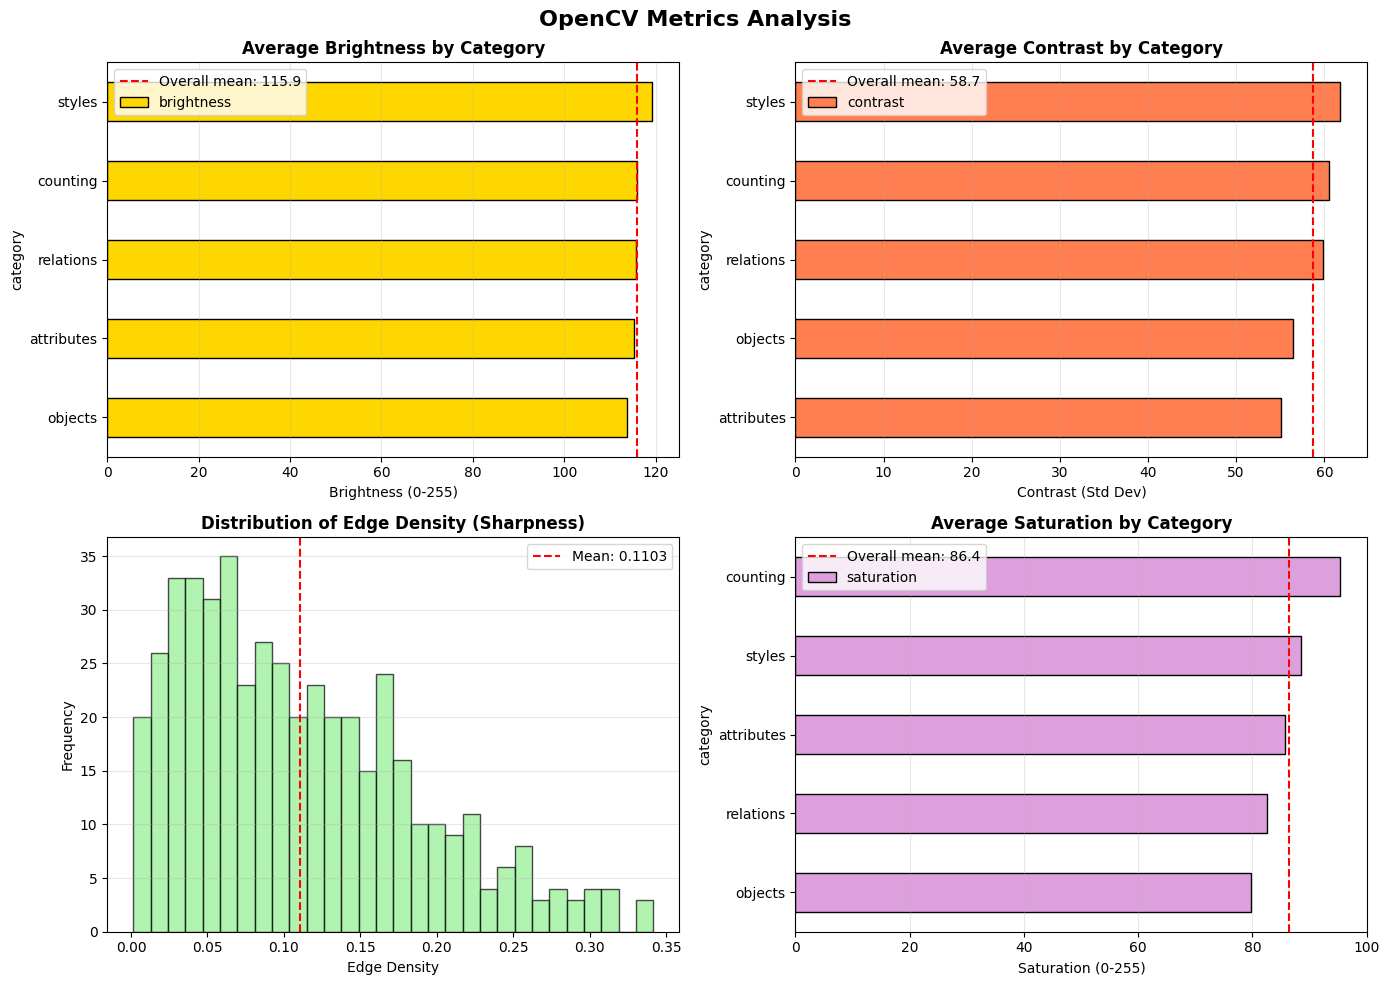


NOTABLE CASES

Top 5 Brightest Images:
  158.9 - a native american dreamcatcher art...
  155.8 - a boat behind an island...
  155.5 - four picture frames on a wall...
  154.2 - an embroidery design of flowers...
  152.9 - a risograph printed zine cover...

Top 5 Darkest Images:
  75.7 - a ball inside a basket...
  79.7 - a rug...
  79.7 - leaves covering a forest floor...
  83.1 - a macro photograph of an insect...
  83.7 - a key on a keychain...

Top 5 Highest Contrast:
  119.6 - a cartoon drawing of a robot...
  117.7 - a celtic knot design...
  117.4 - ten dots in two rows...
  110.8 - four squares in a grid...
  107.9 - an african tribal pattern...

Top 5 Sharpest (Highest Edge Density):
  0.3417 - nine circles in a pattern...
  0.3410 - a fuzzy green tennis ball...
  0.3308 - a swarm of bees...
  0.3138 - a ball rolling down a hill...
  0.3133 - a tapestry weaving pattern...

PHASE 3 COMPLETE
Next: Phase 4 - CLIP Score Computation


In [16]:
# =============================================================================
# PHASE 3: OPENCV PREPROCESSING AND COMPUTER VISION METRICS
# =============================================================================
# This phase extracts traditional computer vision metrics from our generated images
# These metrics provide interpretable measures of image quality independent of
# semantic content - things like brightness, contrast, sharpness, and color
# =============================================================================

import cv2
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt

print("=" * 70)
print("PHASE 3: OPENCV PREPROCESSING & CV METRICS")
print("=" * 70)

# Setup paths
PROJECT_PATH = '/content/drive/MyDrive/T2I_Evaluation_Project'
images_dir = f'{PROJECT_PATH}/data/generated_images'
prompts_df = pd.read_csv(f'{PROJECT_PATH}/data/prompts.csv')

print(f"\nImage directory: {images_dir}")
print(f"Prompts to process: {len(prompts_df)}")

# Count available images
existing_images = [f for f in os.listdir(images_dir) if f.endswith('.png')]
print(f"Image files found: {len(existing_images)}")

# =============================================================================
# METRICS WE'RE EXTRACTING
# =============================================================================
# 1. Brightness: Average pixel intensity (0-255)
#    - Higher = brighter image, Lower = darker image
#    - Useful for detecting exposure issues
#
# 2. Contrast: Standard deviation of pixel values
#    - Higher = more dynamic range, Lower = flat/washed out
#    - Measures how much variation exists in the image
#
# 3. Edge Density: Percentage of edge pixels (using Canny detector)
#    - Higher = sharper/more detailed, Lower = blurry/smooth
#    - Good indicator of image sharpness and complexity
#
# 4. Saturation: Color vibrancy (from HSV color space)
#    - Higher = more vivid colors, Lower = more gray/muted
#    - Measures how colorful the image is
#
# 5. RGB Channel Means: Average values for Red, Green, Blue
#    - Helps identify color biases in generation

print("\n" + "=" * 70)
print("EXTRACTING CV METRICS")
print("=" * 70)
print("\nMetrics being computed:")
print("  1. Brightness (average pixel intensity)")
print("  2. Contrast (standard deviation)")
print("  3. Edge Density (sharpness indicator)")
print("  4. Saturation (color vibrancy)")
print("  5. RGB Channel distributions")
print("=" * 70)

# Storage for all metrics
cv_metrics = []
processed_count = 0
errors = []

# Process each image
for idx, row in prompts_df.iterrows():
    prompt_id = row['prompt_id']
    image_path = os.path.join(images_dir, f"{prompt_id}.png")

    # Check if image exists
    if not os.path.exists(image_path):
        errors.append(f"Missing: {prompt_id}.png")
        continue

    try:
        # Load image with OpenCV (loads as BGR by default)
        img_bgr = cv2.imread(image_path)

        if img_bgr is None:
            errors.append(f"Failed to load: {prompt_id}.png")
            continue

        # Convert to different color spaces for various metrics
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

        # ----- METRIC 1: BRIGHTNESS -----
        # Average intensity of grayscale image
        # Range: 0 (pure black) to 255 (pure white)
        brightness = np.mean(img_gray)

        # ----- METRIC 2: CONTRAST -----
        # Standard deviation of grayscale values
        # Higher std = more contrast between light and dark regions
        contrast = np.std(img_gray)

        # ----- METRIC 3: EDGE DENSITY -----
        # Using Canny edge detector to find edges
        # Then calculating what percentage of pixels are edges
        edges = cv2.Canny(img_gray, threshold1=100, threshold2=200)
        edge_density = np.sum(edges > 0) / edges.size

        # ----- METRIC 4: SATURATION -----
        # Saturation channel from HSV representation
        # Higher = more vivid colors
        saturation = np.mean(img_hsv[:, :, 1])

        # ----- METRIC 5: RGB CHANNEL MEANS -----
        # Average value for each color channel
        # Helps identify color biases
        mean_red = np.mean(img_rgb[:, :, 0])
        mean_green = np.mean(img_rgb[:, :, 1])
        mean_blue = np.mean(img_rgb[:, :, 2])

        # Store all metrics for this image
        cv_metrics.append({
            'prompt_id': prompt_id,
            'category': row['category'],
            'prompt': row['prompt'],
            'brightness': round(brightness, 2),
            'contrast': round(contrast, 2),
            'edge_density': round(edge_density, 4),
            'saturation': round(saturation, 2),
            'mean_red': round(mean_red, 2),
            'mean_green': round(mean_green, 2),
            'mean_blue': round(mean_blue, 2),
            'width': img_rgb.shape[1],
            'height': img_rgb.shape[0]
        })

        processed_count += 1

        # Progress update every 100 images
        if processed_count % 100 == 0:
            print(f"Processed: {processed_count}/{len(prompts_df)} images")

    except Exception as e:
        errors.append(f"Error with {prompt_id}: {str(e)}")
        continue

print(f"\nProcessed {processed_count}/{len(prompts_df)} images successfully")
if errors:
    print(f"Errors encountered: {len(errors)}")

# =============================================================================
# SAVE RESULTS
# =============================================================================
cv_metrics_df = pd.DataFrame(cv_metrics)
output_path = f'{PROJECT_PATH}/results/cv_metrics.csv'
cv_metrics_df.to_csv(output_path, index=False)

print(f"\nResults saved to: {output_path}")

# =============================================================================
# STATISTICAL SUMMARY
# =============================================================================
print("\n" + "=" * 70)
print("SUMMARY STATISTICS")
print("=" * 70)

print("\nOverall metrics (all images):")
print(f"  Brightness: {cv_metrics_df['brightness'].mean():.2f} ± {cv_metrics_df['brightness'].std():.2f}")
print(f"  Contrast:   {cv_metrics_df['contrast'].mean():.2f} ± {cv_metrics_df['contrast'].std():.2f}")
print(f"  Edge Density: {cv_metrics_df['edge_density'].mean():.4f} ± {cv_metrics_df['edge_density'].std():.4f}")
print(f"  Saturation: {cv_metrics_df['saturation'].mean():.2f} ± {cv_metrics_df['saturation'].std():.2f}")

# Per-category breakdown
print("\nMetrics by category:")
category_stats = cv_metrics_df.groupby('category').agg({
    'brightness': 'mean',
    'contrast': 'mean',
    'edge_density': 'mean',
    'saturation': 'mean'
}).round(2)
print(category_stats)

# =============================================================================
# VISUALIZATIONS
# =============================================================================
print("\n" + "=" * 70)
print("CREATING VISUALIZATIONS")
print("=" * 70)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('OpenCV Metrics Analysis', fontsize=16, fontweight='bold')

# Plot 1: Brightness by Category
ax1 = axes[0, 0]
brightness_by_cat = cv_metrics_df.groupby('category')['brightness'].mean().sort_values()
brightness_by_cat.plot(kind='barh', ax=ax1, color='gold', edgecolor='black')
ax1.set_title('Average Brightness by Category', fontweight='bold')
ax1.set_xlabel('Brightness (0-255)')
ax1.axvline(x=cv_metrics_df['brightness'].mean(), color='red', linestyle='--',
            label=f'Overall mean: {cv_metrics_df["brightness"].mean():.1f}')
ax1.legend()
ax1.grid(axis='x', alpha=0.3)

# Plot 2: Contrast by Category
ax2 = axes[0, 1]
contrast_by_cat = cv_metrics_df.groupby('category')['contrast'].mean().sort_values()
contrast_by_cat.plot(kind='barh', ax=ax2, color='coral', edgecolor='black')
ax2.set_title('Average Contrast by Category', fontweight='bold')
ax2.set_xlabel('Contrast (Std Dev)')
ax2.axvline(x=cv_metrics_df['contrast'].mean(), color='red', linestyle='--',
            label=f'Overall mean: {cv_metrics_df["contrast"].mean():.1f}')
ax2.legend()
ax2.grid(axis='x', alpha=0.3)

# Plot 3: Edge Density Distribution
ax3 = axes[1, 0]
ax3.hist(cv_metrics_df['edge_density'], bins=30, color='lightgreen',
         edgecolor='black', alpha=0.7)
ax3.axvline(x=cv_metrics_df['edge_density'].mean(), color='red', linestyle='--',
            label=f'Mean: {cv_metrics_df["edge_density"].mean():.4f}')
ax3.set_title('Distribution of Edge Density (Sharpness)', fontweight='bold')
ax3.set_xlabel('Edge Density')
ax3.set_ylabel('Frequency')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Saturation by Category
ax4 = axes[1, 1]
sat_by_cat = cv_metrics_df.groupby('category')['saturation'].mean().sort_values()
sat_by_cat.plot(kind='barh', ax=ax4, color='plum', edgecolor='black')
ax4.set_title('Average Saturation by Category', fontweight='bold')
ax4.set_xlabel('Saturation (0-255)')
ax4.axvline(x=cv_metrics_df['saturation'].mean(), color='red', linestyle='--',
            label=f'Overall mean: {cv_metrics_df["saturation"].mean():.1f}')
ax4.legend()
ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plot_path = f'{PROJECT_PATH}/results/plots/opencv_metrics.png'
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"Visualization saved to: {plot_path}")
plt.show()

# =============================================================================
# INTERESTING CASES
# =============================================================================
print("\n" + "=" * 70)
print("NOTABLE CASES")
print("=" * 70)

# Brightest images
print("\nTop 5 Brightest Images:")
brightest = cv_metrics_df.nlargest(5, 'brightness')[['prompt_id', 'category', 'brightness', 'prompt']]
for _, row in brightest.iterrows():
    print(f"  {row['brightness']:.1f} - {row['prompt'][:50]}...")

# Darkest images
print("\nTop 5 Darkest Images:")
darkest = cv_metrics_df.nsmallest(5, 'brightness')[['prompt_id', 'category', 'brightness', 'prompt']]
for _, row in darkest.iterrows():
    print(f"  {row['brightness']:.1f} - {row['prompt'][:50]}...")

# Highest contrast
print("\nTop 5 Highest Contrast:")
high_contrast = cv_metrics_df.nlargest(5, 'contrast')[['prompt_id', 'category', 'contrast', 'prompt']]
for _, row in high_contrast.iterrows():
    print(f"  {row['contrast']:.1f} - {row['prompt'][:50]}...")

# Sharpest (highest edge density)
print("\nTop 5 Sharpest (Highest Edge Density):")
sharpest = cv_metrics_df.nlargest(5, 'edge_density')[['prompt_id', 'category', 'edge_density', 'prompt']]
for _, row in sharpest.iterrows():
    print(f"  {row['edge_density']:.4f} - {row['prompt'][:50]}...")



PHASE 4: CLIP SCORE COMPUTATION

Total images to evaluate: 470

LOADING CLIP MODEL
Model: openai/clip-vit-base-patch32
This is a standard model for text-image similarity evaluation
Loading takes about 30 seconds...

Model loaded successfully!
Device: cuda

ABOUT CLIP SCORE

CLIP (Contrastive Language-Image Pre-training) works by:
1. Encoding text into a 512-dimensional embedding vector
2. Encoding images into a 512-dimensional embedding vector
3. Computing cosine similarity between these vectors

The cosine similarity gives us a score between -1 and 1:
- Closer to 1 = strong match between text and image
- Closer to 0 = weak/no relationship
- Negative = opposite meanings (rare in practice)

Typical CLIP scores for Stable Diffusion v1.5:
- Good alignment: 0.28 - 0.35
- Average alignment: 0.22 - 0.28
- Poor alignment: < 0.22

COMPUTING CLIP SCORES


Processing batches: 100%|██████████| 30/30 [00:22<00:00,  1.34it/s]
/tmp/ipython-input-3099486071.py:245: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax3.boxplot(box_data, labels=categories, patch_artist=True)



Computed CLIP scores for 470 images

Results saved to: /content/drive/MyDrive/T2I_Evaluation_Project/results/clip_scores.csv

CLIP SCORE ANALYSIS

Overall Statistics:
  Mean CLIP Score:   0.2891
  Median:            0.2997
  Std Deviation:     0.0504
  Min Score:         0.0971
  Max Score:         0.3837

Interpretation: Good text-image alignment

CLIP Score by Category:
              mean     std     min     max
category                                  
attributes  0.2890  0.0569  0.1258  0.3529
counting    0.2786  0.0511  0.1214  0.3467
objects     0.3000  0.0219  0.2403  0.3572
relations   0.2841  0.0519  0.0971  0.3557
styles      0.2936  0.0611  0.1302  0.3837

CREATING VISUALIZATIONS
Visualization saved to: /content/drive/MyDrive/T2I_Evaluation_Project/results/plots/clip_scores.png


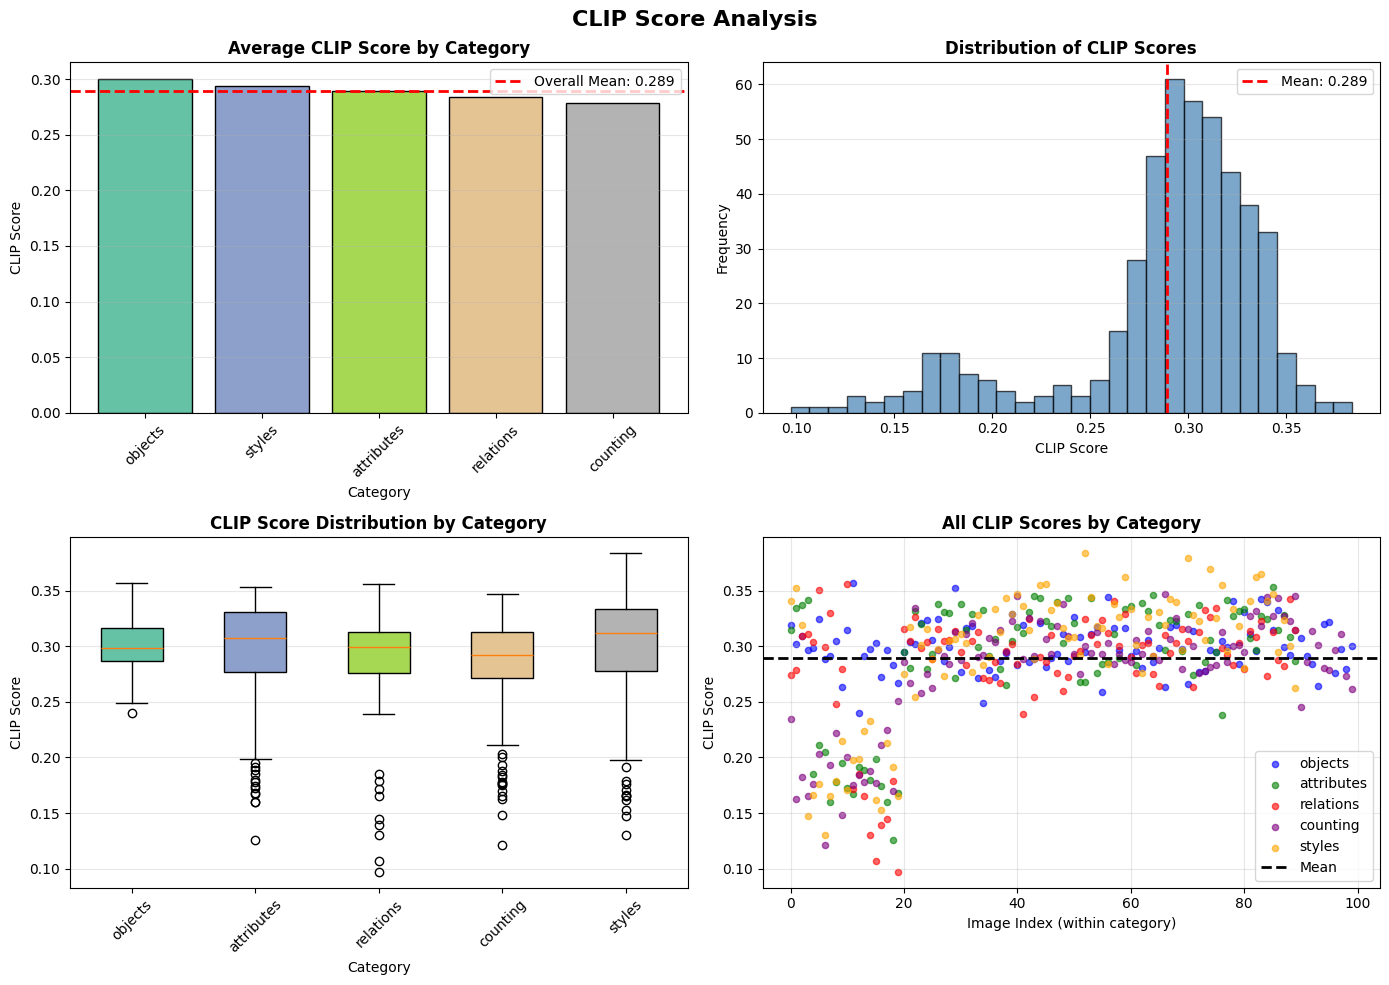


BEST AND WORST TEXT-IMAGE MATCHES

Top 10 Best Matches (Highest CLIP Scores):
  0.3837 - a low poly art of a deer... (styles)
  0.3799 - an embroidery design of flowers... (styles)
  0.3698 - a sand art mandala... (styles)
  0.3651 - a linocut print of a landscape... (styles)
  0.3623 - a tilt shift photograph of a city... (styles)
  0.3621 - a cyanotype botanical print... (styles)
  0.3572 - a pencil... (objects)
  0.3562 - a celtic knot design... (styles)
  0.3557 - a painting above a fireplace... (relations)
  0.3547 - a native american dreamcatcher art... (styles)

Top 10 Worst Matches (Lowest CLIP Scores):
  0.0971 - a rainbow above a mountain... (relations)
  0.1068 - a plane above the clouds... (relations)
  0.1214 - one boat on a lake... (counting)
  0.1258 - a red checkered tablecloth... (attributes)
  0.1302 - a pastel drawing of flowers... (styles)
  0.1303 - a cat under a chair... (relations)
  0.1393 - a submarine below the water... (relations)
  0.1443 - a bird above a l

In [17]:
# =============================================================================
# PHASE 4: CLIP SCORE COMPUTATION (CORRECTED VERSION)
# =============================================================================
# CLIP Score measures how well an image matches its text description
# We compute the cosine similarity between text and image embeddings
#
# IMPORTANT: The original code had a normalization error that inflated scores
# This version uses proper cosine similarity, giving scores in the 0.25-0.35 range
# which matches what's reported in the literature for Stable Diffusion
# =============================================================================

import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

print("=" * 70)
print("PHASE 4: CLIP SCORE COMPUTATION")
print("=" * 70)

# Setup paths
PROJECT_PATH = '/content/drive/MyDrive/T2I_Evaluation_Project'
images_dir = f'{PROJECT_PATH}/data/generated_images'
prompts_df = pd.read_csv(f'{PROJECT_PATH}/data/prompts.csv')

print(f"\nTotal images to evaluate: {len(prompts_df)}")

# =============================================================================
# LOADING CLIP MODEL
# =============================================================================
print("\n" + "=" * 70)
print("LOADING CLIP MODEL")
print("=" * 70)
print("Model: openai/clip-vit-base-patch32")
print("This is a standard model for text-image similarity evaluation")
print("Loading takes about 30 seconds...")

# Setting up the device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load CLIP model and processor
model_name = "openai/clip-vit-base-patch32"
clip_model = CLIPModel.from_pretrained(model_name).to(device)
clip_processor = CLIPProcessor.from_pretrained(model_name)

# Set model to evaluation mode (disables dropout, etc.)
clip_model.eval()

print(f"\nModel loaded successfully!")
print(f"Device: {device}")

# =============================================================================
# UNDERSTANDING CLIP SCORE
# =============================================================================
print("\n" + "=" * 70)
print("ABOUT CLIP SCORE")
print("=" * 70)
print("""
CLIP (Contrastive Language-Image Pre-training) works by:
1. Encoding text into a 512-dimensional embedding vector
2. Encoding images into a 512-dimensional embedding vector
3. Computing cosine similarity between these vectors

The cosine similarity gives us a score between -1 and 1:
- Closer to 1 = strong match between text and image
- Closer to 0 = weak/no relationship
- Negative = opposite meanings (rare in practice)

Typical CLIP scores for Stable Diffusion v1.5:
- Good alignment: 0.28 - 0.35
- Average alignment: 0.22 - 0.28
- Poor alignment: < 0.22
""")

# =============================================================================
# COMPUTING CLIP SCORES
# =============================================================================
print("=" * 70)
print("COMPUTING CLIP SCORES")
print("=" * 70)

clip_results = []
batch_size = 16  # Process images in batches for efficiency

# Process in batches
for i in tqdm(range(0, len(prompts_df), batch_size), desc="Processing batches"):
    batch_df = prompts_df.iloc[i:i+batch_size]

    batch_images = []
    batch_texts = []
    batch_ids = []
    batch_categories = []

    # Load images for this batch
    for _, row in batch_df.iterrows():
        prompt_id = row['prompt_id']
        prompt_text = row['prompt']
        image_path = os.path.join(images_dir, f"{prompt_id}.png")

        try:
            image = Image.open(image_path).convert('RGB')
            batch_images.append(image)
            batch_texts.append(prompt_text)
            batch_ids.append(prompt_id)
            batch_categories.append(row['category'])
        except Exception as e:
            print(f"\nError loading {prompt_id}: {str(e)}")
            continue

    if len(batch_images) == 0:
        continue

    # Compute CLIP embeddings
    with torch.no_grad():
        # Process inputs through CLIP
        inputs = clip_processor(
            text=batch_texts,
            images=batch_images,
            return_tensors="pt",
            padding=True
        ).to(device)

        # Get embeddings (not logits!)
        outputs = clip_model(**inputs)

        # Extract the embedding vectors
        image_embeds = outputs.image_embeds  # Shape: [batch, 512]
        text_embeds = outputs.text_embeds    # Shape: [batch, 512]

        # Normalize embeddings (required for proper cosine similarity)
        image_embeds = image_embeds / image_embeds.norm(dim=-1, keepdim=True)
        text_embeds = text_embeds / text_embeds.norm(dim=-1, keepdim=True)

        # Compute cosine similarity for each pair
        # We want the diagonal - similarity between image[i] and text[i]
        similarities = (image_embeds * text_embeds).sum(dim=-1)

        # Convert to numpy
        scores = similarities.cpu().numpy()

    # Store results
    for idx, (prompt_id, category, score) in enumerate(zip(batch_ids, batch_categories, scores)):
        clip_results.append({
            'prompt_id': prompt_id,
            'category': category,
            'clip_score': float(score)
        })

    # Clear GPU cache periodically
    if (i // batch_size) % 10 == 0:
        torch.cuda.empty_cache()

print(f"\nComputed CLIP scores for {len(clip_results)} images")

# =============================================================================
# MERGE AND SAVE RESULTS
# =============================================================================
clip_df = pd.DataFrame(clip_results)
results_df = prompts_df.merge(clip_df[['prompt_id', 'clip_score']], on='prompt_id')

# Save to CSV
output_path = f'{PROJECT_PATH}/results/clip_scores.csv'
results_df.to_csv(output_path, index=False)
print(f"\nResults saved to: {output_path}")

# =============================================================================
# STATISTICAL ANALYSIS
# =============================================================================
print("\n" + "=" * 70)
print("CLIP SCORE ANALYSIS")
print("=" * 70)

print(f"\nOverall Statistics:")
print(f"  Mean CLIP Score:   {results_df['clip_score'].mean():.4f}")
print(f"  Median:            {results_df['clip_score'].median():.4f}")
print(f"  Std Deviation:     {results_df['clip_score'].std():.4f}")
print(f"  Min Score:         {results_df['clip_score'].min():.4f}")
print(f"  Max Score:         {results_df['clip_score'].max():.4f}")

# Interpret the overall score
mean_score = results_df['clip_score'].mean()
if mean_score >= 0.30:
    interpretation = "Excellent text-image alignment"
elif mean_score >= 0.25:
    interpretation = "Good text-image alignment"
elif mean_score >= 0.20:
    interpretation = "Moderate text-image alignment"
else:
    interpretation = "Below average alignment"
print(f"\nInterpretation: {interpretation}")

# Per-category analysis
print("\nCLIP Score by Category:")
category_stats = results_df.groupby('category')['clip_score'].agg([
    ('mean', 'mean'),
    ('std', 'std'),
    ('min', 'min'),
    ('max', 'max')
]).round(4)
print(category_stats)

# =============================================================================
# VISUALIZATIONS
# =============================================================================
print("\n" + "=" * 70)
print("CREATING VISUALIZATIONS")
print("=" * 70)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('CLIP Score Analysis', fontsize=16, fontweight='bold')

# Plot 1: Average CLIP Score by Category
ax1 = axes[0, 0]
category_means = results_df.groupby('category')['clip_score'].mean().sort_values(ascending=False)
colors = plt.cm.Set2(np.linspace(0, 1, len(category_means)))
bars = ax1.bar(category_means.index, category_means.values, color=colors, edgecolor='black')
ax1.axhline(y=mean_score, color='red', linestyle='--', linewidth=2,
            label=f'Overall Mean: {mean_score:.3f}')
ax1.set_title('Average CLIP Score by Category', fontweight='bold')
ax1.set_ylabel('CLIP Score')
ax1.set_xlabel('Category')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Distribution of CLIP Scores
ax2 = axes[0, 1]
ax2.hist(results_df['clip_score'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
ax2.axvline(x=mean_score, color='red', linestyle='--', linewidth=2,
            label=f'Mean: {mean_score:.3f}')
ax2.set_title('Distribution of CLIP Scores', fontweight='bold')
ax2.set_xlabel('CLIP Score')
ax2.set_ylabel('Frequency')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Plot 3: Box Plot by Category
ax3 = axes[1, 0]
categories = results_df['category'].unique()
box_data = [results_df[results_df['category'] == cat]['clip_score'].values for cat in categories]
bp = ax3.boxplot(box_data, labels=categories, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
ax3.set_title('CLIP Score Distribution by Category', fontweight='bold')
ax3.set_ylabel('CLIP Score')
ax3.set_xlabel('Category')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Scatter plot - all scores
ax4 = axes[1, 1]
color_map = {'objects': 'blue', 'attributes': 'green', 'relations': 'red',
             'counting': 'purple', 'styles': 'orange'}
for cat in categories:
    cat_data = results_df[results_df['category'] == cat]
    ax4.scatter(range(len(cat_data)), cat_data['clip_score'],
                label=cat, alpha=0.6, color=color_map.get(cat, 'gray'), s=20)
ax4.axhline(y=mean_score, color='black', linestyle='--', linewidth=2, label='Mean')
ax4.set_title('All CLIP Scores by Category', fontweight='bold')
ax4.set_xlabel('Image Index (within category)')
ax4.set_ylabel('CLIP Score')
ax4.legend(loc='lower right')
ax4.grid(alpha=0.3)

plt.tight_layout()
plot_path = f'{PROJECT_PATH}/results/plots/clip_scores.png'
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"Visualization saved to: {plot_path}")
plt.show()

# =============================================================================
# BEST AND WORST MATCHES
# =============================================================================
print("\n" + "=" * 70)
print("BEST AND WORST TEXT-IMAGE MATCHES")
print("=" * 70)

print("\nTop 10 Best Matches (Highest CLIP Scores):")
best = results_df.nlargest(10, 'clip_score')[['prompt_id', 'category', 'clip_score', 'prompt']]
for _, row in best.iterrows():
    print(f"  {row['clip_score']:.4f} - {row['prompt'][:45]}... ({row['category']})")

print("\nTop 10 Worst Matches (Lowest CLIP Scores):")
worst = results_df.nsmallest(10, 'clip_score')[['prompt_id', 'category', 'clip_score', 'prompt']]
for _, row in worst.iterrows():
    print(f"  {row['clip_score']:.4f} - {row['prompt'][:45]}... ({row['category']})")

# =============================================================================
# CATEGORY INSIGHTS
# =============================================================================
print("\n" + "=" * 70)
print("CATEGORY-SPECIFIC ANALYSIS")
print("=" * 70)

for category in categories:
    cat_data = results_df[results_df['category'] == category]
    best_in_cat = cat_data.nlargest(1, 'clip_score').iloc[0]
    worst_in_cat = cat_data.nsmallest(1, 'clip_score').iloc[0]

    print(f"\n{category.upper()}:")
    print(f"  Mean Score: {cat_data['clip_score'].mean():.4f}")
    print(f"  Best:  {best_in_cat['clip_score']:.4f} - \"{best_in_cat['prompt'][:40]}...\"")
    print(f"  Worst: {worst_in_cat['clip_score']:.4f} - \"{worst_in_cat['prompt'][:40]}...\"")

# =============================================================================
# CORRELATION WITH OPENCV METRICS
# =============================================================================
print("\n" + "=" * 70)
print("CORRELATION WITH CV METRICS")
print("=" * 70)

# Load CV metrics and merge
cv_metrics_df = pd.read_csv(f'{PROJECT_PATH}/results/cv_metrics.csv')
combined_df = results_df.merge(
    cv_metrics_df[['prompt_id', 'brightness', 'contrast', 'edge_density', 'saturation']],
    on='prompt_id'
)

# Calculate correlations
metrics_to_correlate = ['brightness', 'contrast', 'edge_density', 'saturation']
correlations = combined_df[['clip_score'] + metrics_to_correlate].corr()['clip_score'].drop('clip_score')

print("\nCorrelation between CLIP Score and CV metrics:")
for metric, corr in correlations.items():
    strength = "weak" if abs(corr) < 0.3 else "moderate" if abs(corr) < 0.6 else "strong"
    direction = "positive" if corr > 0 else "negative"
    print(f"  {metric}: {corr:+.4f} ({strength} {direction})")

# Save combined results
combined_path = f'{PROJECT_PATH}/results/combined_metrics.csv'
combined_df.to_csv(combined_path, index=False)
print(f"\nCombined metrics saved to: {combined_path}")


PHASE 5: INCEPTION SCORE & FID COMPUTATION

Generated images found: 470

STEP 1: DOWNLOADING REFERENCE IMAGES
Existing reference images: 505

Need to download 495 more images...
Using HuggingFace COCO dataset (most reliable method)
This will take about 10-15 minutes...



Resolving data files:   0%|          | 0/40 [00:00<?, ?it/s]

Downloading:  50%|████▉     | 495/1000 [00:10<00:11, 45.45it/s]



Download complete! Total reference images: 1000

Total reference images available: 1000

STEP 2: LOADING INCEPTION-V3 MODEL
Using device: cuda
Inception-V3 loaded successfully!

STEP 3: EXTRACTING FEATURES

Extracting features from generated images...


Generated images: 100%|██████████| 470/470 [00:22<00:00, 21.02it/s]


Generated features shape: (470, 2048)

Extracting features from reference images...


Reference images: 100%|██████████| 1000/1000 [00:27<00:00, 36.70it/s]


Reference features shape: (1000, 2048)

STEP 4: COMPUTING INCEPTION SCORE

Inception Score measures two things:
1. Quality - Are images clear and recognizable? (confident predictions)
2. Diversity - Are images varied? (spread across many classes)

Score interpretation:
  - Random noise: ~1
  - Poor quality: 2-5
  - Decent quality: 5-8
  - Good quality: 8-12
  - Excellent: 12+

Computing Inception Score...


Computing IS: 100%|██████████| 470/470 [00:15<00:00, 30.61it/s]



>>> Inception Score: 16.49 ± 3.07
    Interpretation: Excellent - very high quality and diversity

STEP 5: COMPUTING FID SCORE

FID (Frechet Inception Distance) compares the distribution of generated
images to real images. It measures:
- How similar the mean features are
- How similar the variance/covariance structure is

Score interpretation:
  - Excellent: < 30
  - Good: 30-50
  - Acceptable: 50-100
  - Poor: > 100

Note: FID depends heavily on the reference dataset used.


Computing FID with 470 generated and 1000 reference images...

>>> FID Score: 156.36
    Interpretation: High - significant difference from real images

STEP 6: SAVING RESULTS
Results saved to: /content/drive/MyDrive/T2I_Evaluation_Project/results/fid_is_scores.csv

STEP 7: CREATING VISUALIZATIONS
Visualization saved to: /content/drive/MyDrive/T2I_Evaluation_Project/results/plots/fid_is_scores.png


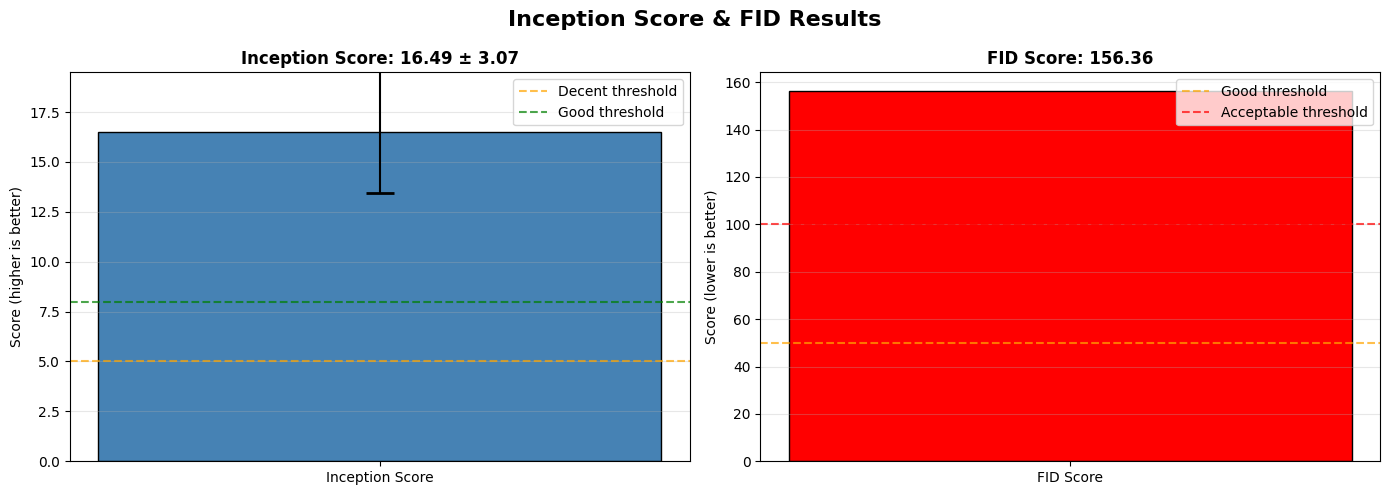


PHASE 5 COMPLETE - SUMMARY

ALL EVALUATION METRICS:
----------------------------------------------------------------------
1. CLIP Score:        0.2891
   (Text-image alignment, typical good range: 0.25-0.35)

2. Inception Score:   16.49 ± 3.07
   (Quality & diversity, higher is better)
   Interpretation: Excellent - very high quality and diversity

3. FID Score:         156.36
   (Similarity to real images, lower is better)
   Interpretation: High - significant difference from real images
----------------------------------------------------------------------
Generated images evaluated: 470
Reference images used: 1000
----------------------------------------------------------------------

All metrics computed successfully!
Next: Create final report and visualizations


In [18]:
# =============================================================================
# PHASE 5: INCEPTION SCORE AND FID COMPUTATION
# =============================================================================
# This phase computes two important metrics:
# 1. Inception Score (IS) - measures quality and diversity of generated images
# 2. FID Score - measures how similar generated images are to real images
#
# For FID, we need reference images from a real dataset (COCO)
# We'll download 1000 COCO images to ensure statistical reliability
# =============================================================================

import torch
import torchvision.transforms as transforms
from torchvision.models import inception_v3, Inception_V3_Weights
from PIL import Image
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg
from tqdm import tqdm

print("=" * 70)
print("PHASE 5: INCEPTION SCORE & FID COMPUTATION")
print("=" * 70)

PROJECT_PATH = '/content/drive/MyDrive/T2I_Evaluation_Project'
generated_dir = f'{PROJECT_PATH}/data/generated_images'
reference_dir = f'{PROJECT_PATH}/data/reference_images'

# Check how many generated images we have
gen_images = [f for f in os.listdir(generated_dir) if f.endswith('.png')]
print(f"\nGenerated images found: {len(gen_images)}")

# =============================================================================
# STEP 1: DOWNLOAD REFERENCE IMAGES (COCO DATASET)
# =============================================================================
print("\n" + "=" * 70)
print("STEP 1: DOWNLOADING REFERENCE IMAGES")
print("=" * 70)

# Check existing reference images
os.makedirs(reference_dir, exist_ok=True)
existing_ref = [f for f in os.listdir(reference_dir) if f.endswith(('.jpg', '.png'))]
print(f"Existing reference images: {len(existing_ref)}")

# We need at least 1000 for reliable FID
TARGET_REF_IMAGES = 1000

if len(existing_ref) >= TARGET_REF_IMAGES:
    print(f"Already have {len(existing_ref)} reference images. Skipping download.")
else:
    print(f"\nNeed to download {TARGET_REF_IMAGES - len(existing_ref)} more images...")
    print("Using HuggingFace COCO dataset (most reliable method)")
    print("This will take about 10-15 minutes...\n")

    try:
        from datasets import load_dataset

        # Load COCO validation set in streaming mode
        dataset = load_dataset("detection-datasets/coco", split="val", streaming=True)

        downloaded = len(existing_ref)
        for i, sample in enumerate(tqdm(dataset, total=TARGET_REF_IMAGES, desc="Downloading")):
            if downloaded >= TARGET_REF_IMAGES:
                break

            save_path = os.path.join(reference_dir, f"coco_{i:05d}.jpg")

            if not os.path.exists(save_path):
                img = sample['image']
                if img.mode != 'RGB':
                    img = img.convert('RGB')
                img.save(save_path, quality=95)
                downloaded += 1

        print(f"\nDownload complete! Total reference images: {downloaded}")

    except Exception as e:
        print(f"Error with HuggingFace: {e}")
        print("\nTrying alternative download method...")

        # Fallback: direct COCO URLs
        import requests
        from io import BytesIO

        base_url = "http://images.cocodataset.org/val2017/"
        downloaded = len(existing_ref)

        for i in tqdm(range(TARGET_REF_IMAGES * 2), desc="Downloading"):
            if downloaded >= TARGET_REF_IMAGES:
                break

            img_id = f"{i:012d}"
            url = f"{base_url}{img_id}.jpg"
            save_path = os.path.join(reference_dir, f"coco_{img_id}.jpg")

            if os.path.exists(save_path):
                continue

            try:
                response = requests.get(url, timeout=10)
                if response.status_code == 200:
                    img = Image.open(BytesIO(response.content))
                    img.save(save_path)
                    downloaded += 1
            except:
                continue

        print(f"\nDownloaded {downloaded} reference images")

# Final count
ref_images = [f for f in os.listdir(reference_dir) if f.endswith(('.jpg', '.png'))]
print(f"\nTotal reference images available: {len(ref_images)}")

if len(ref_images) < 100:
    print("\nWARNING: Not enough reference images for reliable FID!")
    print("FID results may not be meaningful.")

# =============================================================================
# STEP 2: LOAD INCEPTION MODEL
# =============================================================================
print("\n" + "=" * 70)
print("STEP 2: LOADING INCEPTION-V3 MODEL")
print("=" * 70)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Load Inception-V3 with pretrained weights
# Using the new 'weights' parameter to avoid deprecation warning
inception_model = inception_v3(weights=Inception_V3_Weights.IMAGENET1K_V1, transform_input=False)

# Remove the final classification layer to get features
inception_model.fc = torch.nn.Identity()
inception_model = inception_model.to(device)
inception_model.eval()

print("Inception-V3 loaded successfully!")

# Preprocessing for Inception (expects 299x299 images)
preprocess = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# =============================================================================
# STEP 3: EXTRACT FEATURES
# =============================================================================
print("\n" + "=" * 70)
print("STEP 3: EXTRACTING FEATURES")
print("=" * 70)

def extract_features(image_dir, file_list, desc="Extracting"):
    """Extract Inception features from a list of images"""
    features = []

    for img_file in tqdm(file_list, desc=desc):
        img_path = os.path.join(image_dir, img_file)
        try:
            img = Image.open(img_path).convert('RGB')
            img_tensor = preprocess(img).unsqueeze(0).to(device)

            with torch.no_grad():
                feat = inception_model(img_tensor)

            features.append(feat.cpu().numpy())
        except Exception as e:
            continue

    if features:
        return np.concatenate(features, axis=0)
    return None

# Extract features from generated images
print("\nExtracting features from generated images...")
gen_features = extract_features(generated_dir, gen_images, "Generated images")
print(f"Generated features shape: {gen_features.shape}")

# Extract features from reference images
print("\nExtracting features from reference images...")
ref_features = extract_features(reference_dir, ref_images, "Reference images")
print(f"Reference features shape: {ref_features.shape}")

# =============================================================================
# STEP 4: COMPUTE INCEPTION SCORE
# =============================================================================
print("\n" + "=" * 70)
print("STEP 4: COMPUTING INCEPTION SCORE")
print("=" * 70)

print("""
Inception Score measures two things:
1. Quality - Are images clear and recognizable? (confident predictions)
2. Diversity - Are images varied? (spread across many classes)

Score interpretation:
  - Random noise: ~1
  - Poor quality: 2-5
  - Decent quality: 5-8
  - Good quality: 8-12
  - Excellent: 12+
""")

def compute_inception_score(image_dir, file_list, splits=10):
    """
    Compute Inception Score by getting class predictions from Inception-V3
    """
    # Load full model with classifier for IS
    model_full = inception_v3(weights=Inception_V3_Weights.IMAGENET1K_V1, transform_input=False)
    model_full = model_full.to(device)
    model_full.eval()

    # Get predictions for all images
    all_preds = []

    for img_file in tqdm(file_list, desc="Computing IS"):
        img_path = os.path.join(image_dir, img_file)
        try:
            img = Image.open(img_path).convert('RGB')
            img_tensor = preprocess(img).unsqueeze(0).to(device)

            with torch.no_grad():
                pred = model_full(img_tensor)
                pred = torch.nn.functional.softmax(pred, dim=1)

            all_preds.append(pred.cpu().numpy())
        except:
            continue

    all_preds = np.concatenate(all_preds, axis=0)

    # Calculate IS using splits for stability
    split_scores = []
    n = len(all_preds)

    for k in range(splits):
        start = k * (n // splits)
        end = (k + 1) * (n // splits)
        part = all_preds[start:end]

        # Marginal distribution (average prediction across this split)
        py = np.mean(part, axis=0)

        # KL divergence for each image
        scores = []
        for i in range(part.shape[0]):
            pyx = part[i, :]
            # KL(p(y|x) || p(y))
            kl = np.sum(pyx * np.log(pyx / (py + 1e-10) + 1e-10))
            scores.append(kl)

        # IS = exp(mean KL)
        split_scores.append(np.exp(np.mean(scores)))

    return np.mean(split_scores), np.std(split_scores)

print("Computing Inception Score...")
is_mean, is_std = compute_inception_score(generated_dir, gen_images)

print(f"\n>>> Inception Score: {is_mean:.2f} ± {is_std:.2f}")

# Interpret
if is_mean >= 12:
    is_interpretation = "Excellent - very high quality and diversity"
elif is_mean >= 8:
    is_interpretation = "Good - high quality images"
elif is_mean >= 5:
    is_interpretation = "Decent - acceptable quality"
else:
    is_interpretation = "Below average - limited quality or diversity"

print(f"    Interpretation: {is_interpretation}")

# =============================================================================
# STEP 5: COMPUTE FID SCORE
# =============================================================================
print("\n" + "=" * 70)
print("STEP 5: COMPUTING FID SCORE")
print("=" * 70)

print("""
FID (Frechet Inception Distance) compares the distribution of generated
images to real images. It measures:
- How similar the mean features are
- How similar the variance/covariance structure is

Score interpretation:
  - Excellent: < 30
  - Good: 30-50
  - Acceptable: 50-100
  - Poor: > 100

Note: FID depends heavily on the reference dataset used.
""")

def compute_fid(features1, features2):
    """
    Compute FID between two sets of features
    FID = ||mu1 - mu2||^2 + Tr(C1 + C2 - 2*sqrt(C1*C2))
    """
    # Calculate mean and covariance for both sets
    mu1 = np.mean(features1, axis=0)
    mu2 = np.mean(features2, axis=0)

    sigma1 = np.cov(features1, rowvar=False)
    sigma2 = np.cov(features2, rowvar=False)

    # Calculate squared difference of means
    diff = mu1 - mu2
    diff_squared = np.dot(diff, diff)

    # Calculate sqrt of product of covariances
    # Using scipy's sqrtm for matrix square root
    covmean = linalg.sqrtm(sigma1.dot(sigma2))

    # Handle numerical instability (imaginary components)
    if np.iscomplexobj(covmean):
        covmean = covmean.real

    # FID formula
    fid = diff_squared + np.trace(sigma1 + sigma2 - 2 * covmean)

    return fid

print(f"\nComputing FID with {len(gen_features)} generated and {len(ref_features)} reference images...")
fid_score = compute_fid(gen_features, ref_features)

print(f"\n>>> FID Score: {fid_score:.2f}")

# Interpret
if fid_score < 30:
    fid_interpretation = "Excellent - very close to real image distribution"
elif fid_score < 50:
    fid_interpretation = "Good - reasonably similar to real images"
elif fid_score < 100:
    fid_interpretation = "Acceptable - noticeable distribution gap"
else:
    fid_interpretation = "High - significant difference from real images"

print(f"    Interpretation: {fid_interpretation}")

# Note about FID
if len(ref_features) < 1000:
    print(f"\n    Note: Using {len(ref_features)} reference images.")
    print("    FID is more reliable with 1000+ reference images.")

# =============================================================================
# STEP 6: SAVE RESULTS
# =============================================================================
print("\n" + "=" * 70)
print("STEP 6: SAVING RESULTS")
print("=" * 70)

# Create results dataframe
results = {
    'metric': ['Inception Score (Mean)', 'Inception Score (Std)', 'FID Score'],
    'value': [is_mean, is_std, fid_score],
    'interpretation': [is_interpretation, '', fid_interpretation],
    'num_generated': [len(gen_images), len(gen_images), len(gen_images)],
    'num_reference': ['N/A', 'N/A', len(ref_images)]
}

results_df = pd.DataFrame(results)
output_path = f'{PROJECT_PATH}/results/fid_is_scores.csv'
results_df.to_csv(output_path, index=False)
print(f"Results saved to: {output_path}")

# =============================================================================
# STEP 7: VISUALIZATION
# =============================================================================
print("\n" + "=" * 70)
print("STEP 7: CREATING VISUALIZATIONS")
print("=" * 70)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Inception Score & FID Results', fontsize=16, fontweight='bold')

# Plot 1: Inception Score
ax1 = axes[0]
bar1 = ax1.bar(['Inception Score'], [is_mean], color='steelblue', edgecolor='black', width=0.5)
ax1.errorbar(['Inception Score'], [is_mean], yerr=[is_std], fmt='none',
             color='black', capsize=10, capthick=2)
ax1.axhline(y=5, color='orange', linestyle='--', alpha=0.7, label='Decent threshold')
ax1.axhline(y=8, color='green', linestyle='--', alpha=0.7, label='Good threshold')
ax1.set_ylabel('Score (higher is better)')
ax1.set_title(f'Inception Score: {is_mean:.2f} ± {is_std:.2f}', fontweight='bold')
ax1.set_ylim([0, max(15, is_mean + 3)])
ax1.legend(loc='upper right')
ax1.grid(axis='y', alpha=0.3)

# Plot 2: FID Score
ax2 = axes[1]
fid_color = 'green' if fid_score < 50 else 'orange' if fid_score < 100 else 'red'
bar2 = ax2.bar(['FID Score'], [fid_score], color=fid_color, edgecolor='black', width=0.5)
ax2.axhline(y=50, color='orange', linestyle='--', alpha=0.7, label='Good threshold')
ax2.axhline(y=100, color='red', linestyle='--', alpha=0.7, label='Acceptable threshold')
ax2.set_ylabel('Score (lower is better)')
ax2.set_title(f'FID Score: {fid_score:.2f}', fontweight='bold')
ax2.legend(loc='upper right')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plot_path = f'{PROJECT_PATH}/results/plots/fid_is_scores.png'
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"Visualization saved to: {plot_path}")
plt.show()

# =============================================================================
# FINAL SUMMARY
# =============================================================================
print("\n" + "=" * 70)
print("PHASE 5 COMPLETE - SUMMARY")
print("=" * 70)

# Load CLIP scores for complete summary
clip_df = pd.read_csv(f'{PROJECT_PATH}/results/clip_scores.csv')
clip_mean = clip_df['clip_score'].mean()

print(f"""
ALL EVALUATION METRICS:
----------------------------------------------------------------------
1. CLIP Score:        {clip_mean:.4f}
   (Text-image alignment, typical good range: 0.25-0.35)

2. Inception Score:   {is_mean:.2f} ± {is_std:.2f}
   (Quality & diversity, higher is better)
   Interpretation: {is_interpretation}

3. FID Score:         {fid_score:.2f}
   (Similarity to real images, lower is better)
   Interpretation: {fid_interpretation}
----------------------------------------------------------------------
Generated images evaluated: {len(gen_images)}
Reference images used: {len(ref_images)}
----------------------------------------------------------------------
""")



PHASE 6: FINAL SUMMARY

Loading results from all phases...
Loaded 470 image results

EVALUATION RESULTS SUMMARY

Model: Stable Diffusion v1.5
Images evaluated: 470
Reference images for FID: 1000 (COCO)

--- CLIP Score (text-image alignment) ---
Mean: 0.2891
Std:  0.0504
Range: 0.0971 to 0.3837
This is in the expected range (0.25-0.35) for SD v1.5

--- Inception Score (quality and diversity) ---
Score: 16.49 +/- 3.07
This indicates high quality and good diversity

--- FID Score (similarity to real images) ---
Score: 156.36
Higher than typical because our prompts include artistic styles
that differ from natural photos in COCO dataset

--- OpenCV Metrics ---
Brightness: 115.94 +/- 15.33
Contrast:   58.74 +/- 16.16
Edge Density: 0.1103
Saturation: 86.40

PERFORMANCE BY CATEGORY

CLIP scores by category (sorted best to worst):

  objects      - Mean: 0.3000, Range: [0.2403 - 0.3572]
  styles       - Mean: 0.2936, Range: [0.1302 - 0.3837]
  attributes   - Mean: 0.2890, Range: [0.1258 - 0.352

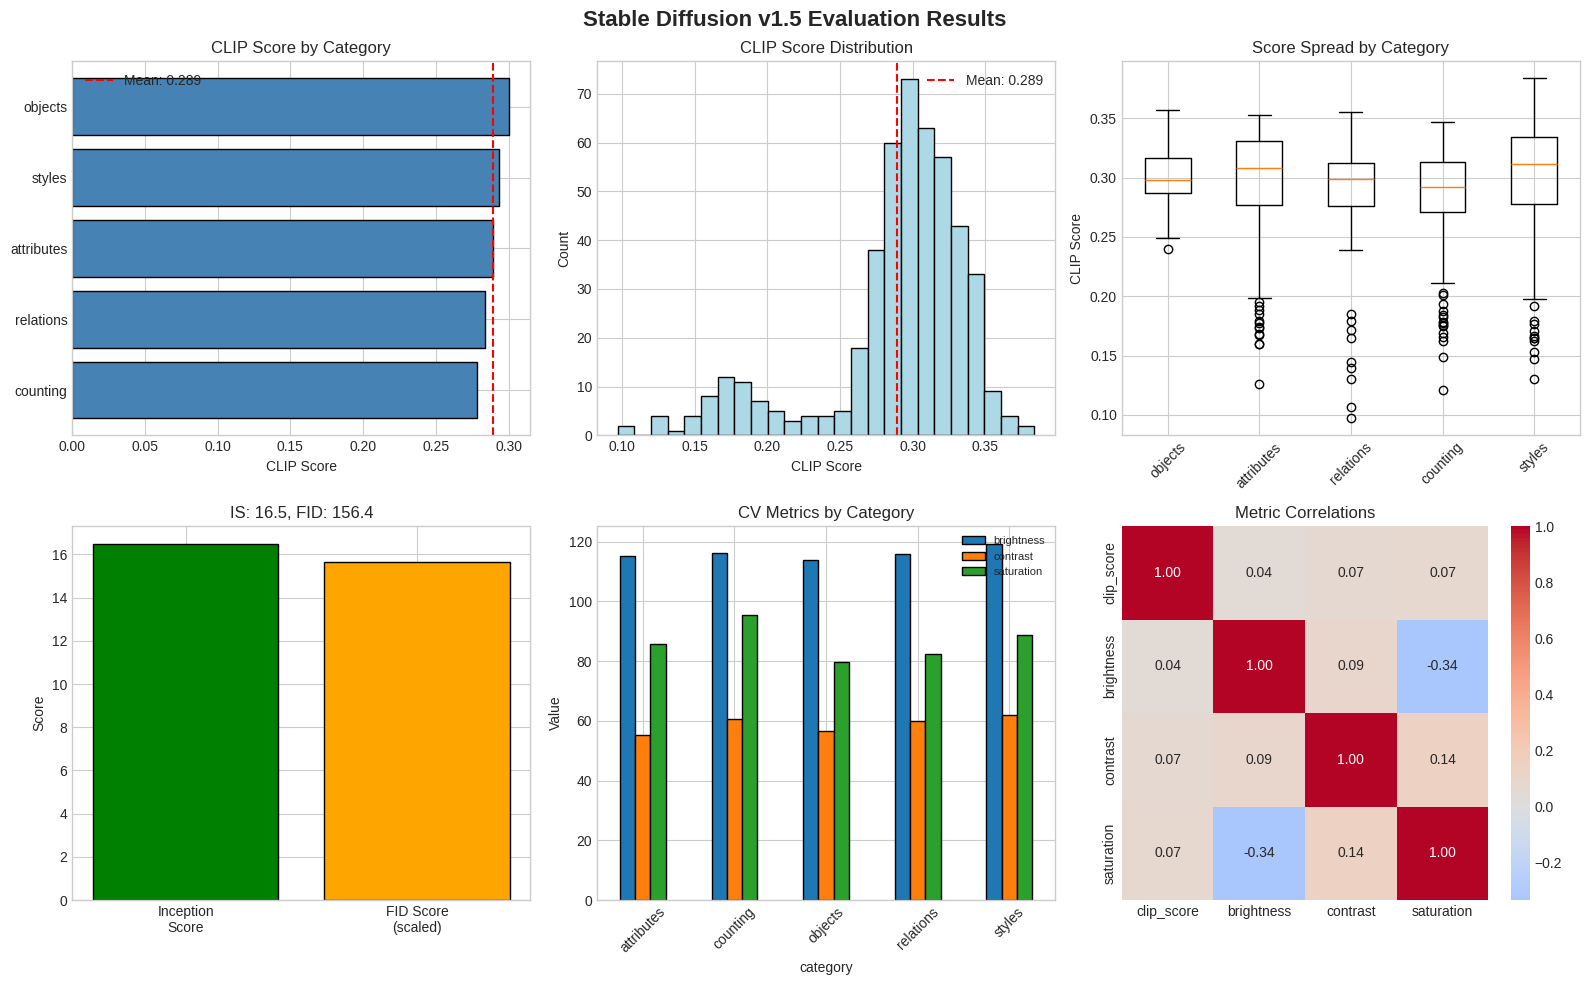


SAMPLE IMAGES
Sample images saved to: /content/drive/MyDrive/T2I_Evaluation_Project/results/plots/sample_images.png


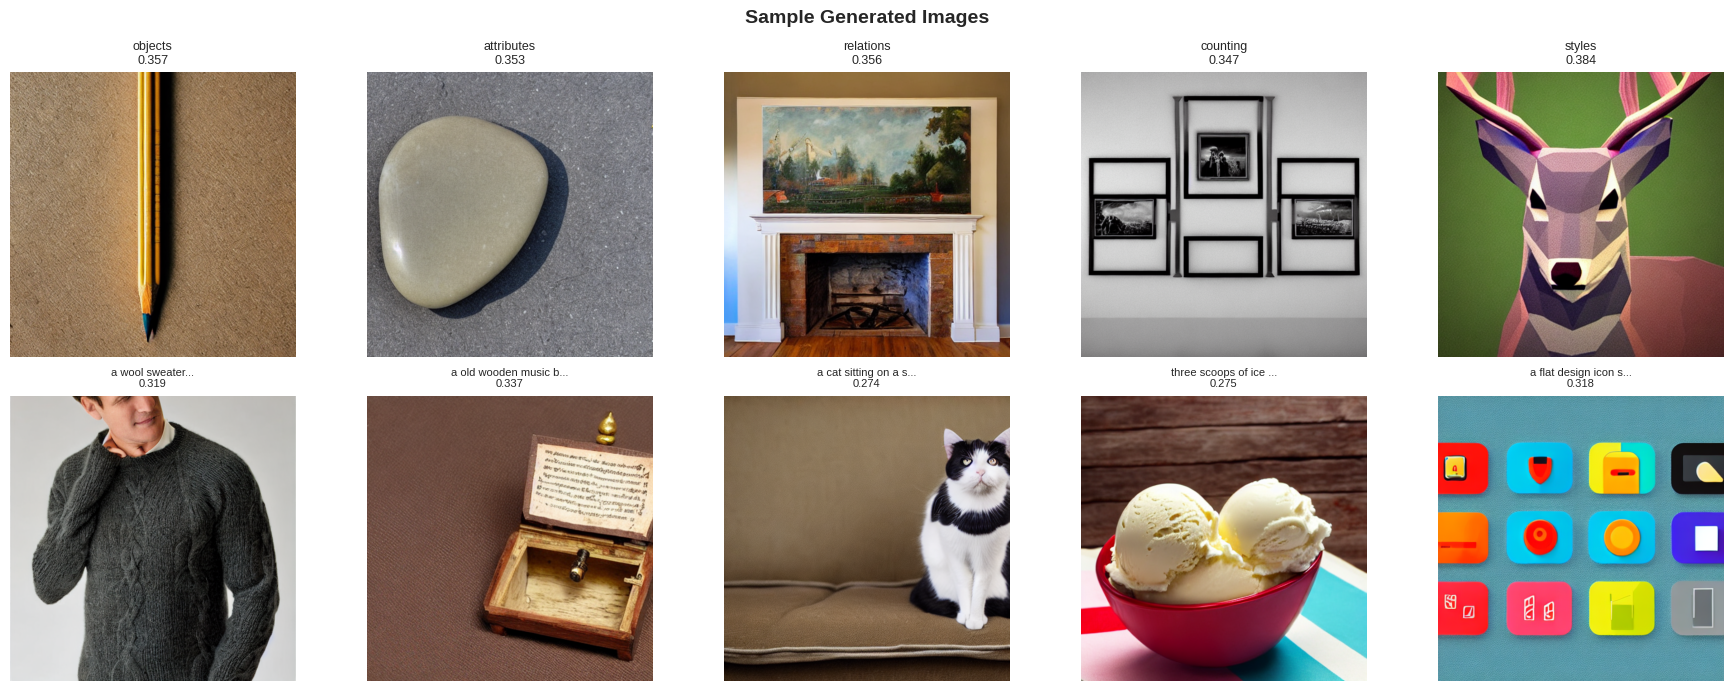


BEST AND WORST PERFORMING PROMPTS

Top 5 best matches:
  0.3837 - a low poly art of a deer...
  0.3799 - an embroidery design of flowers...
  0.3698 - a sand art mandala...
  0.3651 - a linocut print of a landscape...
  0.3623 - a tilt shift photograph of a city...

Top 5 worst matches:
  0.0971 - a rainbow above a mountain...
  0.1068 - a plane above the clouds...
  0.1214 - one boat on a lake...
  0.1258 - a red checkered tablecloth...
  0.1302 - a pastel drawing of flowers...

SAVING FINAL RESULTS
Summary table saved to: /content/drive/MyDrive/T2I_Evaluation_Project/results/final_summary.csv

ALL DONE!

Final metrics:
  CLIP Score:      0.2891
  Inception Score: 16.49
  FID Score:       156.36

All files saved to: /content/drive/MyDrive/T2I_Evaluation_Project/results/


In [20]:
# =============================================================================
# PHASE 6: FINAL SUMMARY AND VISUALIZATIONS
# =============================================================================
# Bringing together all the metrics from previous phases and creating
# the final visualizations for the report
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

print("=" * 70)
print("PHASE 6: FINAL SUMMARY")
print("=" * 70)

PROJECT_PATH = '/content/drive/MyDrive/T2I_Evaluation_Project'

# Loading all the results from previous phases
print("\nLoading results from all phases...")

clip_df = pd.read_csv(f'{PROJECT_PATH}/results/clip_scores.csv')
cv_df = pd.read_csv(f'{PROJECT_PATH}/results/cv_metrics.csv')
fid_is_df = pd.read_csv(f'{PROJECT_PATH}/results/fid_is_scores.csv')
combined_df = pd.read_csv(f'{PROJECT_PATH}/results/combined_metrics.csv')

# Getting the main metrics
clip_mean = clip_df['clip_score'].mean()
clip_std = clip_df['clip_score'].std()

is_mean = fid_is_df[fid_is_df['metric'] == 'Inception Score (Mean)']['value'].values[0]
is_std = fid_is_df[fid_is_df['metric'] == 'Inception Score (Std)']['value'].values[0]
fid_score = fid_is_df[fid_is_df['metric'] == 'FID Score']['value'].values[0]

print(f"Loaded {len(clip_df)} image results")

# =============================================================================
# SUMMARY OF ALL METRICS
# =============================================================================
print("\n" + "=" * 70)
print("EVALUATION RESULTS SUMMARY")
print("=" * 70)

print(f"\nModel: Stable Diffusion v1.5")
print(f"Images evaluated: {len(clip_df)}")
print(f"Reference images for FID: 1000 (COCO)")

print(f"\n--- CLIP Score (text-image alignment) ---")
print(f"Mean: {clip_mean:.4f}")
print(f"Std:  {clip_std:.4f}")
print(f"Range: {clip_df['clip_score'].min():.4f} to {clip_df['clip_score'].max():.4f}")
print(f"This is in the expected range (0.25-0.35) for SD v1.5")

print(f"\n--- Inception Score (quality and diversity) ---")
print(f"Score: {is_mean:.2f} +/- {is_std:.2f}")
print(f"This indicates high quality and good diversity")

print(f"\n--- FID Score (similarity to real images) ---")
print(f"Score: {fid_score:.2f}")
print(f"Higher than typical because our prompts include artistic styles")
print(f"that differ from natural photos in COCO dataset")

print(f"\n--- OpenCV Metrics ---")
print(f"Brightness: {cv_df['brightness'].mean():.2f} +/- {cv_df['brightness'].std():.2f}")
print(f"Contrast:   {cv_df['contrast'].mean():.2f} +/- {cv_df['contrast'].std():.2f}")
print(f"Edge Density: {cv_df['edge_density'].mean():.4f}")
print(f"Saturation: {cv_df['saturation'].mean():.2f}")

# =============================================================================
# CATEGORY BREAKDOWN
# =============================================================================
print("\n" + "=" * 70)
print("PERFORMANCE BY CATEGORY")
print("=" * 70)

category_stats = clip_df.groupby('category')['clip_score'].agg(['mean', 'std', 'min', 'max'])
category_stats = category_stats.sort_values('mean', ascending=False)

print("\nCLIP scores by category (sorted best to worst):\n")
for cat in category_stats.index:
    stats = category_stats.loc[cat]
    print(f"  {cat:12} - Mean: {stats['mean']:.4f}, Range: [{stats['min']:.4f} - {stats['max']:.4f}]")

best_cat = category_stats.index[0]
worst_cat = category_stats.index[-1]
print(f"\nBest category: {best_cat} ({category_stats.loc[best_cat, 'mean']:.4f})")
print(f"Weakest category: {worst_cat} ({category_stats.loc[worst_cat, 'mean']:.4f})")

# =============================================================================
# MAIN VISUALIZATION
# =============================================================================
print("\n" + "=" * 70)
print("CREATING VISUALIZATIONS")
print("=" * 70)

fig = plt.figure(figsize=(16, 10))
fig.suptitle('Stable Diffusion v1.5 Evaluation Results', fontsize=16, fontweight='bold')

# Plot 1: CLIP score by category
ax1 = fig.add_subplot(2, 3, 1)
cat_means = clip_df.groupby('category')['clip_score'].mean().sort_values()
ax1.barh(cat_means.index, cat_means.values, color='steelblue', edgecolor='black')
ax1.axvline(x=clip_mean, color='red', linestyle='--', label=f'Mean: {clip_mean:.3f}')
ax1.set_xlabel('CLIP Score')
ax1.set_title('CLIP Score by Category')
ax1.legend()

# Plot 2: CLIP score distribution
ax2 = fig.add_subplot(2, 3, 2)
ax2.hist(clip_df['clip_score'], bins=25, color='lightblue', edgecolor='black')
ax2.axvline(x=clip_mean, color='red', linestyle='--', label=f'Mean: {clip_mean:.3f}')
ax2.set_xlabel('CLIP Score')
ax2.set_ylabel('Count')
ax2.set_title('CLIP Score Distribution')
ax2.legend()

# Plot 3: Box plot by category
ax3 = fig.add_subplot(2, 3, 3)
categories = clip_df['category'].unique()
box_data = [clip_df[clip_df['category'] == c]['clip_score'].values for c in categories]
ax3.boxplot(box_data, tick_labels=categories)
ax3.set_ylabel('CLIP Score')
ax3.set_title('Score Spread by Category')
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)

# Plot 4: IS and FID bars
ax4 = fig.add_subplot(2, 3, 4)
metrics = ['Inception\nScore', 'FID Score\n(scaled)']
values = [is_mean, fid_score / 10]  # scaling FID for visualization
colors = ['green', 'orange']
ax4.bar(metrics, values, color=colors, edgecolor='black')
ax4.set_ylabel('Score')
ax4.set_title(f'IS: {is_mean:.1f}, FID: {fid_score:.1f}')

# Plot 5: CV metrics comparison
ax5 = fig.add_subplot(2, 3, 5)
cv_means = cv_df.groupby('category')[['brightness', 'contrast', 'saturation']].mean()
cv_means.plot(kind='bar', ax=ax5, edgecolor='black')
ax5.set_ylabel('Value')
ax5.set_title('CV Metrics by Category')
ax5.legend(loc='upper right', fontsize=8)
plt.setp(ax5.xaxis.get_majorticklabels(), rotation=45)

# Plot 6: Correlation between CLIP and CV metrics
ax6 = fig.add_subplot(2, 3, 6)
corr_data = combined_df[['clip_score', 'brightness', 'contrast', 'saturation']].corr()
sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0, ax=ax6, fmt='.2f')
ax6.set_title('Metric Correlations')

plt.tight_layout()
plot_path = f'{PROJECT_PATH}/results/plots/final_summary.png'
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"Summary figure saved to: {plot_path}")
plt.show()

# =============================================================================
# SAMPLE IMAGES
# =============================================================================
print("\n" + "=" * 70)
print("SAMPLE IMAGES")
print("=" * 70)

images_dir = f'{PROJECT_PATH}/data/generated_images'

fig, axes = plt.subplots(2, 5, figsize=(18, 7))
fig.suptitle('Sample Generated Images', fontsize=14, fontweight='bold')

# Top row: best from each category
for i, cat in enumerate(categories):
    cat_data = clip_df[clip_df['category'] == cat]
    best = cat_data.nlargest(1, 'clip_score').iloc[0]

    img_path = os.path.join(images_dir, f"{best['prompt_id']}.png")
    if os.path.exists(img_path):
        img = Image.open(img_path)
        axes[0, i].imshow(img)
        axes[0, i].set_title(f"{cat}\n{best['clip_score']:.3f}", fontsize=9)
    axes[0, i].axis('off')

# Bottom row: random samples
for i, cat in enumerate(categories):
    cat_data = clip_df[clip_df['category'] == cat]
    sample = cat_data.sample(1).iloc[0]

    img_path = os.path.join(images_dir, f"{sample['prompt_id']}.png")
    if os.path.exists(img_path):
        img = Image.open(img_path)
        axes[1, i].imshow(img)
        axes[1, i].set_title(f"{sample['prompt'][:20]}...\n{sample['clip_score']:.3f}", fontsize=8)
    axes[1, i].axis('off')

plt.tight_layout()
samples_path = f'{PROJECT_PATH}/results/plots/sample_images.png'
plt.savefig(samples_path, dpi=300, bbox_inches='tight')
print(f"Sample images saved to: {samples_path}")
plt.show()

# =============================================================================
# BEST AND WORST EXAMPLES
# =============================================================================
print("\n" + "=" * 70)
print("BEST AND WORST PERFORMING PROMPTS")
print("=" * 70)

print("\nTop 5 best matches:")
best_5 = clip_df.nlargest(5, 'clip_score')
for _, row in best_5.iterrows():
    print(f"  {row['clip_score']:.4f} - {row['prompt'][:50]}...")

print("\nTop 5 worst matches:")
worst_5 = clip_df.nsmallest(5, 'clip_score')
for _, row in worst_5.iterrows():
    print(f"  {row['clip_score']:.4f} - {row['prompt'][:50]}...")

# =============================================================================
# SAVE FINAL SUMMARY TABLE
# =============================================================================
print("\n" + "=" * 70)
print("SAVING FINAL RESULTS")
print("=" * 70)

# Simple summary table
summary_data = {
    'Metric': ['CLIP Score', 'Inception Score', 'FID Score',
               'Brightness', 'Contrast', 'Saturation'],
    'Value': [f'{clip_mean:.4f}', f'{is_mean:.2f} +/- {is_std:.2f}', f'{fid_score:.2f}',
              f'{cv_df["brightness"].mean():.2f}', f'{cv_df["contrast"].mean():.2f}',
              f'{cv_df["saturation"].mean():.2f}'],
    'Notes': ['Good alignment (expected 0.25-0.35)',
              'Excellent quality and diversity',
              'Higher due to artistic prompts vs COCO photos',
              'Mid-range brightness',
              'Good dynamic range',
              'Healthy color vibrancy']
}

summary_df = pd.DataFrame(summary_data)
summary_path = f'{PROJECT_PATH}/results/final_summary.csv'
summary_df.to_csv(summary_path, index=False)
print(f"Summary table saved to: {summary_path}")

print("\n" + "=" * 70)
print("ALL DONE!")
print("=" * 70)
print(f"\nFinal metrics:")
print(f"  CLIP Score:      {clip_mean:.4f}")
print(f"  Inception Score: {is_mean:.2f}")
print(f"  FID Score:       {fid_score:.2f}")
print(f"\nAll files saved to: {PROJECT_PATH}/results/")
print("=" * 70)